In [30]:
from process_library import *
import os

In [31]:
rng = np.random.RandomState(42)

# data loading 
path_to_parent_folder = "/".join( os.getcwd().split("/")[:-1] ) 
path_to_data = "data/pubchem_data_2023-12-05_343_samples.csv"
path = os.path.join(path_to_parent_folder,path_to_data)

df_all_data = pd.read_csv(path)

In [32]:
df_part1_multisubs = pd.read_csv("../data/additivity_multisubs_part1.csv")

In [33]:
df_part1_multisubs

Substituent    Benzene Unnamed: 2   Pyridine Unnamed: 4
0   Combination  ΔVC(pred)   ΔVC(cal)  ΔVC(pred)   ΔVC(cal)
1   NO2,NO2,NO2       63.6       65.7       59.7       63.7
2      NC,NC,NC       54.0       59.5       50.6       57.5
3   CHO,CHO,CHO       41.4       39.6       35.5       35.8
4      Cl,Cl,Cl       21.0       26.7       19.6       25.1
5      OH,OH,OH       -6.0       -1.9      -10.3       -4.6
6      Me,Me,Me       -9.9      -10.6      -11.2      -12.3
7   OMe,OMe,OMe      -15.0      -10.0      -18.3      -13.4
8   NH2,NH2,NH2      -27.0      -19.9      -33.4      -25.5
9    NO2,NC,CHO       53.0       51.3       48.6       53.9
10  NO2,CHO,OMe       30.0       28.3       25.6       28.4
11   NC,OMe,NH2        4.0        8.4       -0.4        7.0
12     NC,Cl,OH       23.0       28.6       20.0       28.3
13    OH,Me,NH2      -14.3      -11.1      -18.3       -9.5

In [34]:
header_default = df_part1_multisubs.iloc[0,0:].to_list()[0:3]

In [35]:
df_part1_multisubs.columns.to_list()

['Substituent', 'Benzene', 'Unnamed: 2', 'Pyridine', 'Unnamed: 4']

In [36]:
df_part1_multisubs.columns = ['Substituent', 'Benzene', 'Benzene', 'Pyridine', 'Pyridine']


In [37]:
df_part1_multisubs.loc[:,"Substituent":"Benzene"]

Substituent    Benzene   Benzene
0   Combination  ΔVC(pred)  ΔVC(cal)
1   NO2,NO2,NO2       63.6      65.7
2      NC,NC,NC       54.0      59.5
3   CHO,CHO,CHO       41.4      39.6
4      Cl,Cl,Cl       21.0      26.7
5      OH,OH,OH       -6.0      -1.9
6      Me,Me,Me       -9.9     -10.6
7   OMe,OMe,OMe      -15.0     -10.0
8   NH2,NH2,NH2      -27.0     -19.9
9    NO2,NC,CHO       53.0      51.3
10  NO2,CHO,OMe       30.0      28.3
11   NC,OMe,NH2        4.0       8.4
12     NC,Cl,OH       23.0      28.6
13    OH,Me,NH2      -14.3     -11.1

In [38]:
df_part1_multisubs.loc[:,["Substituent","Pyridine"]]

Substituent   Pyridine  Pyridine
0   Combination  ΔVC(pred)  ΔVC(cal)
1   NO2,NO2,NO2       59.7      63.7
2      NC,NC,NC       50.6      57.5
3   CHO,CHO,CHO       35.5      35.8
4      Cl,Cl,Cl       19.6      25.1
5      OH,OH,OH      -10.3      -4.6
6      Me,Me,Me      -11.2     -12.3
7   OMe,OMe,OMe      -18.3     -13.4
8   NH2,NH2,NH2      -33.4     -25.5
9    NO2,NC,CHO       48.6      53.9
10  NO2,CHO,OMe       25.6      28.4
11   NC,OMe,NH2       -0.4       7.0
12     NC,Cl,OH       20.0      28.3
13    OH,Me,NH2      -18.3      -9.5

In [39]:
df_pyridine = df_part1_multisubs.loc[1:,["Substituent","Pyridine"]]
df_pyridine.columns = header_default
df_pyridine.reset_index(inplace=True)

In [40]:
df_benzene = df_part1_multisubs.loc[1:,["Substituent","Benzene"]]
df_benzene.columns = header_default
df_benzene.reset_index(inplace=True)

In [41]:
df_pyridine["Combination_split"] = df_pyridine["Combination"].apply( lambda x: x.split(","))
df_benzene["Combination_split"] = df_benzene["Combination"].apply( lambda x: x.split(","))

In [42]:
df_benzene

index  Combination ΔVC(pred) ΔVC(cal) Combination_split
0       1  NO2,NO2,NO2      63.6     65.7   [NO2, NO2, NO2]
1       2     NC,NC,NC      54.0     59.5      [NC, NC, NC]
2       3  CHO,CHO,CHO      41.4     39.6   [CHO, CHO, CHO]
3       4     Cl,Cl,Cl      21.0     26.7      [Cl, Cl, Cl]
4       5     OH,OH,OH      -6.0     -1.9      [OH, OH, OH]
5       6     Me,Me,Me      -9.9    -10.6      [Me, Me, Me]
6       7  OMe,OMe,OMe     -15.0    -10.0   [OMe, OMe, OMe]
7       8  NH2,NH2,NH2     -27.0    -19.9   [NH2, NH2, NH2]
8       9   NO2,NC,CHO      53.0     51.3    [NO2, NC, CHO]
9      10  NO2,CHO,OMe      30.0     28.3   [NO2, CHO, OMe]
10     11   NC,OMe,NH2       4.0      8.4    [NC, OMe, NH2]
11     12     NC,Cl,OH      23.0     28.6      [NC, Cl, OH]
12     13    OH,Me,NH2     -14.3    -11.1     [OH, Me, NH2]

In [43]:
def data_cleaning_and_wrangling(dataframe):
    df_for_mean_values ,df_for_sum_values = [] , [] 

    for idx in range(dataframe.shape[0]):
        # get the list contained on the column Combination split
        # print(idx)
        substituents_in_molecule =dataframe.Combination_split.iloc[idx]

        # set a list to append the df for each iteration
        df_for_the_selection = []
        for substituent in substituents_in_molecule:
            # exclude those colums that are not numerical 
            df_for_the_selection.append( df_all_data[ df_all_data['substituent']== substituent ].select_dtypes(exclude=['object']) )

        # concatenate the results into a single df
        df_all_data_xtra = pd.concat(df_for_the_selection, axis=0)

        # aggregate to obtain the mean and sum
        df_aggregated  = df_all_data_xtra.agg(['sum', 'mean'])

        # separate the sum and mean into different dataframes\
        df_for_mean_values.append(df_aggregated.loc['mean'])
        df_for_sum_values.append(df_aggregated.loc['sum'])
 
        # sort the values and reset the index to match the original info
 
        # firts mean values 
    df_for_mean_values = pd.concat(df_for_mean_values, axis=1).T
    df_for_mean_values = df_for_mean_values.reset_index()

        # now for sum values 
    df_for_sum_values = pd.concat(df_for_sum_values, axis=1).T
    df_for_sum_values = df_for_sum_values.reset_index()

        # collate all of them into one data frame
    df_results_mean_values = pd.concat([dataframe,df_for_mean_values],axis=1)
    df_results_mean_values.drop("index",axis=1,inplace=True)

    df_for_sum_values = pd.concat([dataframe,df_for_sum_values],axis=1)
    df_for_sum_values.drop("index",axis=1,inplace=True)

        ### return the results 
    return df_results_mean_values , df_for_sum_values

    
    

In [44]:
df_pyridine_mean_values_results , df_pyridine_sum_values_results= data_cleaning_and_wrangling(dataframe=df_pyridine)

In [45]:
df_benzene_mean_values_results , df_benzene_sum_values_results= data_cleaning_and_wrangling(dataframe=df_benzene)
# df_for_mean_values.reindex()

In [46]:
df_pyridine_mean_values_results

Combination ΔVC(pred) ΔVC(cal) Combination_split      ΔVC-m  ΔVC -p  \
0   NO2,NO2,NO2      59.7     63.7   [NO2, NO2, NO2]  19.916540   21.20   
1      NC,NC,NC      50.6     57.5      [NC, NC, NC]  15.335717   14.30   
2   CHO,CHO,CHO      35.5     35.8   [CHO, CHO, CHO]  11.445155   13.80   
3      Cl,Cl,Cl      19.6     25.1      [Cl, Cl, Cl]   9.311621    7.00   
4      OH,OH,OH     -10.3     -4.6      [OH, OH, OH]   0.000000    0.00   
5      Me,Me,Me     -11.2    -12.3      [Me, Me, Me]  -2.109061   -3.30   
6   OMe,OMe,OMe     -18.3    -13.4   [OMe, OMe, OMe]  -0.200000   -5.00   
7   NH2,NH2,NH2     -33.4    -25.5   [NH2, NH2, NH2]  -3.238579   -9.00   
8    NO2,NC,CHO      48.6     53.9    [NO2, NC, CHO]  15.508282   15.90   
9   NO2,CHO,OMe      25.6     28.4   [NO2, CHO, OMe]  10.387232   10.00   
10   NC,OMe,NH2      -0.4      7.0    [NC, OMe, NH2]   6.808214    3.65   
11     NC,Cl,OH      20.0     28.3      [NC, Cl, OH]   9.995764    8.90   
12    OH,Me,NH2     -18.3     -9.5     [OH, Me, NH2]  -1.782547   -4.10   

          σm        σp        Fb        Rc  ...   S   F   Cl   P  Ge  Se  Si  \
0   0.710000  0.780000  0.650000  0.130000  ... NaN NaN  NaN NaN NaN NaN NaN   
1   0.480000  0.490000  0.470000  0.020000  ... NaN NaN  NaN NaN NaN NaN NaN   
2   0.350000  0.420000  0.330000  0.090000  ... NaN NaN  NaN NaN NaN NaN NaN   
3   0.370000  0.230000  0.420000 -0.190000  ... NaN NaN  1.0 NaN NaN NaN NaN   
4   0.000000  0.000000  0.000000  0.000000  ... NaN NaN  NaN NaN NaN NaN NaN   
5  -0.070000 -0.170000  0.010000 -0.180000  ... NaN NaN  NaN NaN NaN NaN NaN   
6   0.120000 -0.270000  0.290000 -0.560000  ... NaN NaN  NaN NaN NaN NaN NaN   
7  -0.160000 -0.660000  0.080000 -0.740000  ... NaN NaN  NaN NaN NaN NaN NaN   
8   0.505000  0.545000  0.480000  0.065000  ... NaN NaN  NaN NaN NaN NaN NaN   
9   0.393333  0.310000  0.423333 -0.113333  ... NaN NaN  NaN NaN NaN NaN NaN   
10  0.230000  0.012500  0.327500 -0.315000  ... NaN NaN  NaN NaN NaN NaN NaN   
11  0.332500  0.302500  0.340000 -0.037500  ... NaN NaN  1.0 NaN NaN NaN NaN   
12 -0.076667 -0.276667  0.030000 -0.306667  ... NaN NaN  NaN NaN NaN NaN NaN   

    Br   B  As  
0  NaN NaN NaN  
1  NaN NaN NaN  
2  NaN NaN NaN  
3  NaN NaN NaN  
4  NaN NaN NaN  
5  NaN NaN NaN  
6  NaN NaN NaN  
7  NaN NaN NaN  
8  NaN NaN NaN  
9  NaN NaN NaN  
10 NaN NaN NaN  
11 NaN NaN NaN  
12 NaN NaN NaN  

[13 rows x 44 columns]

In [47]:
df_pyridine_sum_values_results

Combination ΔVC(pred) ΔVC(cal) Combination_split      ΔVC-m  ΔVC -p    σm  \
0   NO2,NO2,NO2      59.7     63.7   [NO2, NO2, NO2]  59.749620    63.6  2.13   
1      NC,NC,NC      50.6     57.5      [NC, NC, NC]  92.014301    85.8  2.88   
2   CHO,CHO,CHO      35.5     35.8   [CHO, CHO, CHO]  34.335465    41.4  1.05   
3      Cl,Cl,Cl      19.6     25.1      [Cl, Cl, Cl]  27.934863    21.0  1.11   
4      OH,OH,OH     -10.3     -4.6      [OH, OH, OH]   0.000000     0.0  0.00   
5      Me,Me,Me     -11.2    -12.3      [Me, Me, Me]  -6.327183    -9.9 -0.21   
6   OMe,OMe,OMe     -18.3    -13.4   [OMe, OMe, OMe]  -0.600000   -15.0  0.36   
7   NH2,NH2,NH2     -33.4    -25.5   [NH2, NH2, NH2]  -9.715737   -27.0 -0.48   
8    NO2,NC,CHO      48.6     53.9    [NO2, NC, CHO]  62.033129    63.6  2.02   
9   NO2,CHO,OMe      25.6     28.4   [NO2, CHO, OMe]  31.161695    30.0  1.18   
10   NC,OMe,NH2      -0.4      7.0    [NC, OMe, NH2]  27.232855    14.6  0.92   
11     NC,Cl,OH      20.0     28.3      [NC, Cl, OH]  39.983055    35.6  1.33   
12    OH,Me,NH2     -18.3     -9.5     [OH, Me, NH2]  -5.347640   -12.3 -0.23   

      σp    Fb    Rc  ...    S    F   Cl    P   Ge   Se   Si   Br    B   As  
0   2.34  1.95  0.39  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1   2.94  2.82  0.12  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2   1.26  0.99  0.27  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3   0.69  1.26 -0.57  ...  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4   0.00  0.00  0.00  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5  -0.51  0.03 -0.54  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6  -0.81  0.87 -1.68  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7  -1.98  0.24 -2.22  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
8   2.18  1.92  0.26  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9   0.93  1.27 -0.34  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
10  0.05  1.31 -1.26  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11  1.21  1.36 -0.15  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12 -0.83  0.09 -0.92  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[13 rows x 44 columns]

In [48]:
df_pyridine_sum_values_results.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Combination', 'ΔVC(pred)', 'ΔVC(cal)', 'Combination_split', 'ΔVC-m',
       'ΔVC -p', 'σm', 'σp', 'Fb', 'Rc', 'cid', 'molecular_weight',
       'exact_mass', 'monoisotopic_mass', 'charge', 'heavy_atom_count',
       'h_bond_donor_count', 'h_bond_acceptor_count', 'xlogp', 'tpsa',
       'complexity', 'covalent_unit_count', 'all_atoms_count',
       'all_atoms_count_unique', 'Num_of_Rings', 'heavy_atoms',
       'aromatic_bond', 'single_bond', 'double_bond', 'triple_bond', 'C', 'H',
       'N', 'O', 'S', 'F', 'Cl', 'P', 'Ge', 'Se', 'Si', 'Br', 'B', 'As'],
      dtype='object')>

In [59]:
def get_data_separated2(dataframe, test_size=0.2, random_state=None,choice=0):
    if choice == 0 :
        target_feature = ['ΔVC -p'] #+ ΔVC-m,ΔVC -p
        features_to_drop = ['substituent','molecular_formula','Name','canonical_smiles','ΔVC-m','cid']

    elif choice == 1 : 
        target_feature = ['ΔVC-m']
        features_to_drop = ['substituent','molecular_formula','Name','canonical_smiles','ΔVC -p','cid']

    elif choice == 2 : 
        # target_feature = ['ΔVC-m','ΔVC -p']
        # features_to_drop = ['substituent','molecular_formula','Name','canonical_smiles','cid']
        target_feature = ['ΔVC(pred)', 'ΔVC(cal)']
        features_to_drop = ['Combination', 'ΔVC-m','ΔVC -p', 'Combination_split']

    else : 
        target_feature = ['Benzene', 'Pyrene', 'Pyridine', 'Butadiene', 'Butadiyne']
        features_to_drop = ['substituent','molecular_formula','Name','canonical_smiles','cid','ΔVC-m','ΔVC -p','molecular_formula_y','iupac_name',]



    # Assuming 'target_feature' is the dependent variable (y)
    y = dataframe[target_feature]
    X = dataframe.drop(columns=features_to_drop + target_feature)
    X =X.fillna(0)

    # Split into training and testing sets, excluding data_val
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # for this case there is charates in the y-train and test that needs to be altered, excel file formmating issue 
    for col in [target_feature]:
        y_train[col] = y_train[col].apply(lambda v: float(v.replace('−', '-')) if isinstance(v, str) else v)
        y_test[col]= y_test[col].apply(lambda v: float(v.replace('−', '-')) if isinstance(v, str) else v)

    y_train = y_train.astype(float)
    y_test = y_test.astype(float)
    return X_train, X_test, y_train, y_test

In [50]:
def plot_the_r2_v2(y_true, X_pred , model): #(model,X_test,y_test,tag)
    y_true = y_true.to_numpy().ravel()
    y_pred = model.predict(X_pred)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, color='blue')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red')
    plt.title('Real Values vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Plot Residuals
    residuals = y_true - y_pred.ravel()

    plt.subplot(1, 2, 2)
    plt.scatter(y_true, residuals, color='green')
    plt.axhline(y=0, linestyle='--', color='red')
    plt.title('Residual Plot')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

In [51]:
def scaling_data2(X_train,X_test):

    scaler = StandardScaler()

    scaler.fit(X_train)
        
        # filename = '../models/scaler_for_all_features.sav'
        # pickle.dump(scaler, open(filename, 'wb'))
        
    scaled_train = scaler.transform(X_train)
    scaled_test = scaler.transform(X_test)
    return scaled_train,scaled_test

In [62]:
X_train, X_test, y_train, y_test = get_data_separated2(df_pyridine_sum_values_results,random_state=rng,choice=2)
feature_names_involved_in_training = X_train.columns

X_train, X_test = scaling_data2(X_train, X_test)
target_feature_name = "-".join(y_train.columns.to_list()).replace(" ","")

In [63]:
regression_models = load_regression_models()

In [64]:
models_to_test = ['Multi-layer Perceptron','Ridge','Random Forest','Linear Regression']

In [66]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 8 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ΔVC(pred)  10 non-null     float64
 1   ΔVC(cal)   10 non-null     float64
dtypes: float64(2)
memory usage: 240.0 bytes


*************** Linear Regression ***************


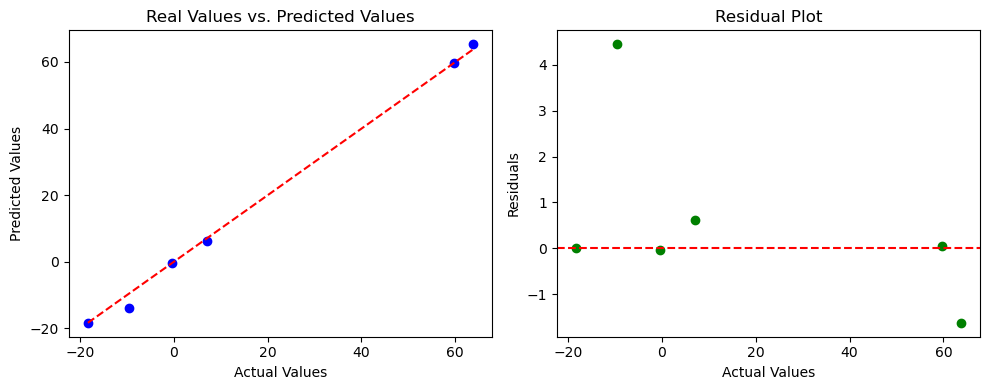

*************** Ridge ***************


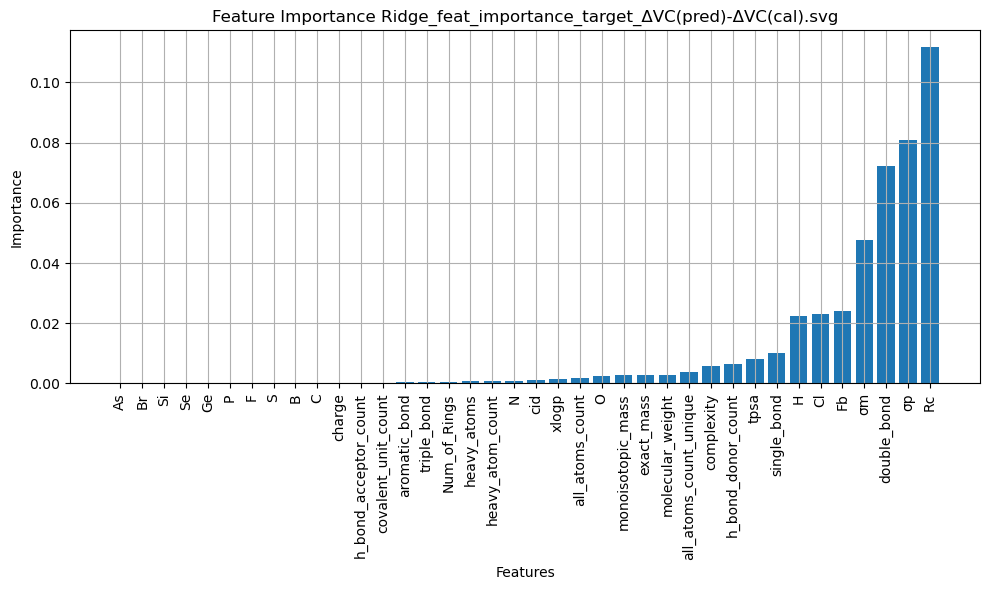

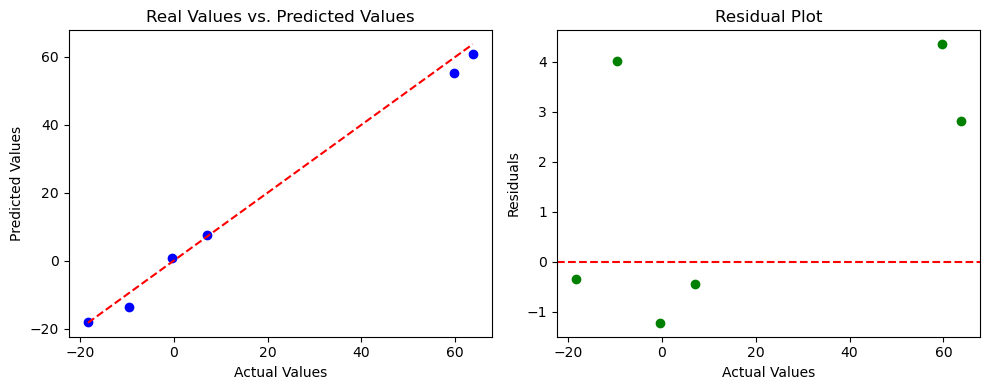

*************** Random Forest ***************


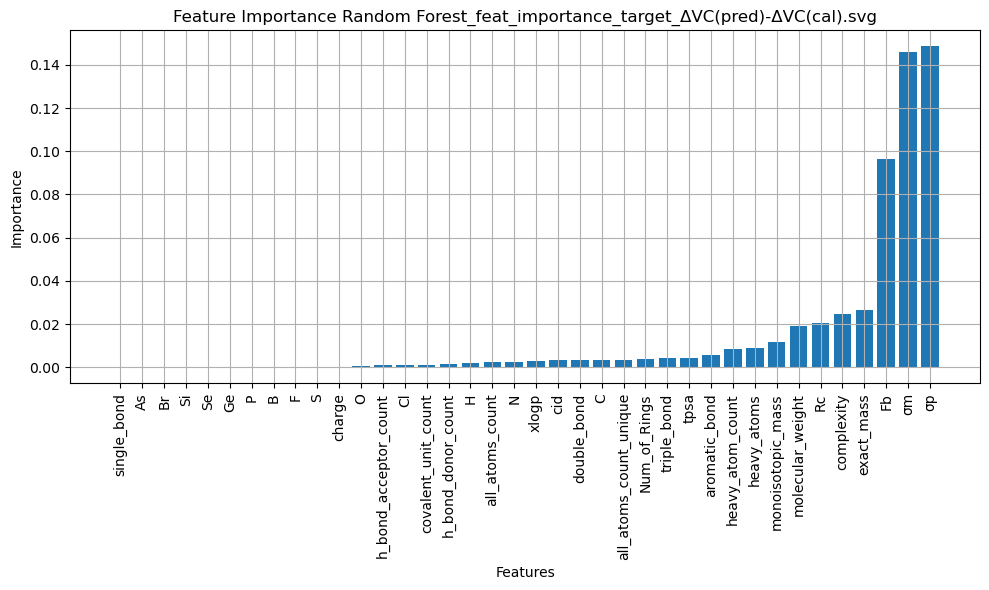

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


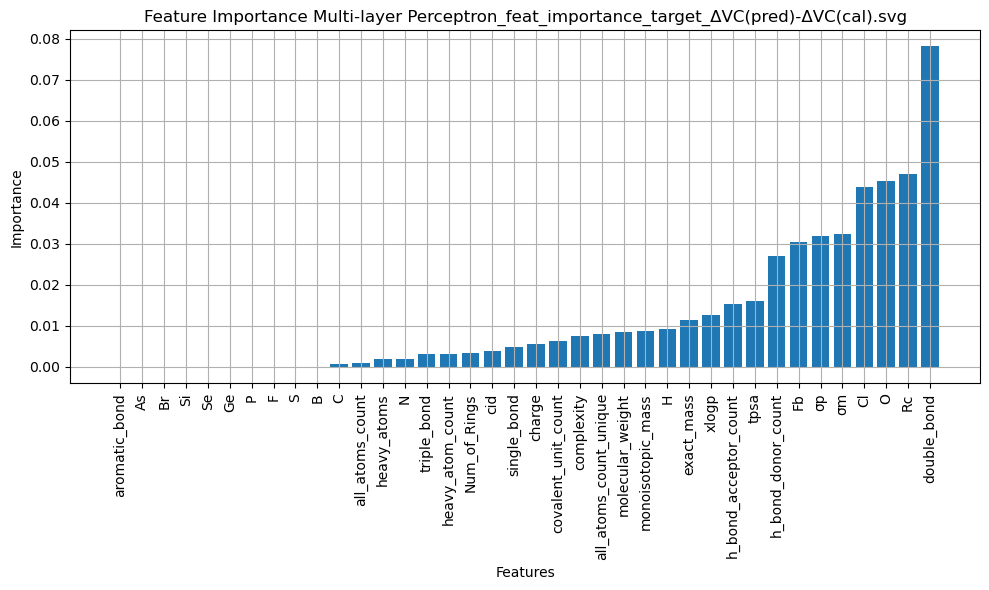

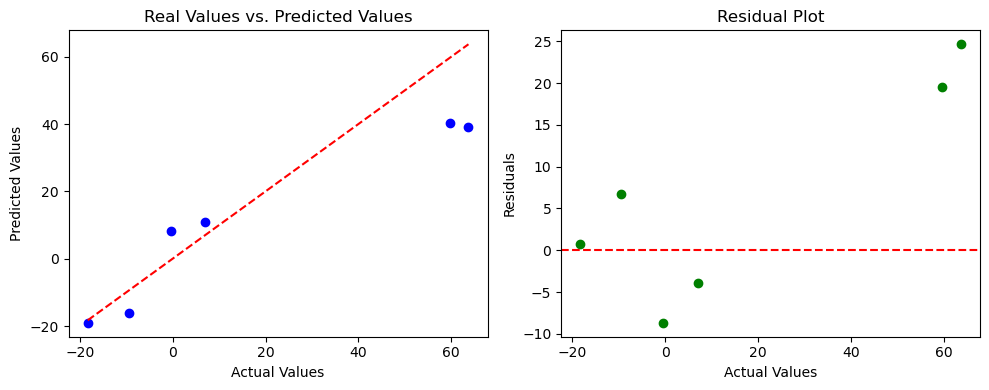

In [67]:
val_results_list = []
for name, model in regression_models.items():
    if name in models_to_test:
        print ('*'*15,name,'*'*15)
        model.fit(X_train, y_train)
        # y_pred = model.predict(X_test)
        # print ( y_pred )
        # print (y_test  )

        val_results_list.append ( save_metrics_results(model=model,X_test=X_test,y_test=y_test,tag=name) )

        feat_name, feat_importance = plot_features_using_permutation_importance( model=model,
                                                                                X_train=X_train, 
                                                                                y_train=y_train, 
                                                                                random_state=rng, 
                                                                                feature_names_ori=feature_names_involved_in_training,
                                                                                filename=f"{path_to_parent_folder}/figures/{name}_feat_importance_target_{target_feature_name}.svg")
        plot_the_r2_v2(model=model, y_true=y_test , X_pred=X_test)

In [68]:
val_results_df = pd.concat(val_results_list)
val_results_df.sort_values(by=["R^2", "MAE"],ascending=False)

R^2        MAE         MSE       MAPE      MedAE
Linear Regression       0.996132   1.129940    3.801290   0.112112   0.829498
Ridge                   0.992837   2.192982    7.438987   0.610286   2.013914
Multi-layer Perceptron  0.818546  10.693902  187.209991   3.951696   7.696700
Random Forest           0.537568  18.807000  483.867499  11.322719  24.211500

In [69]:
def train_ml_reg_models(data):
    # choice is firx in number 2 for this specific case
    X_train, X_test, y_train, y_test = get_data_separated2(dataframe=data,random_state=rng,choice=2)
    feature_names_involved_in_training = X_train.columns

    X_train, X_test = scaling_data2(X_train, X_test)
    target_feature_name = "-".join(y_train.columns.to_list()).replace(" ","")
    val_results_list = []
    for name, model in regression_models.items():
        if name in models_to_test:
            print ('*'*15,name,'*'*15)
            model.fit(X_train, y_train)


            val_results_list.append ( save_metrics_results(model=model,X_test=X_test,y_test=y_test,tag=name) )

            feat_name, feat_importance = plot_features_using_permutation_importance( model=model,
                                                                                    X_train=X_train, 
                                                                                    y_train=y_train, 
                                                                                    random_state=rng, 
                                                                                    feature_names_ori=feature_names_involved_in_training,
                                                                                    filename=f"{path_to_parent_folder}/figures/{name}_feat_importance_target_{target_feature_name}.svg")
            plot_the_r2_v2(model=model, y_true=y_test , X_pred=X_test)
    val_results_df = pd.concat(val_results_list)
    val_results_df.sort_values(by=["R^2", "MAE"],ascending=False)
    return val_results_df
    

In [70]:
dict_of_dataframe_results = {'benzene_mean_val':df_benzene_mean_values_results ,
                              'benzene_sum_val':df_benzene_sum_values_results ,
                              'pyridine_mean_val':df_pyridine_mean_values_results , 
                              'pyridine_sum_val':df_pyridine_sum_values_results
                              }

%%%%%%%%%%%%%%% benzene_mean_val %%%%%%%%%%%%%%%
*************** Linear Regression ***************


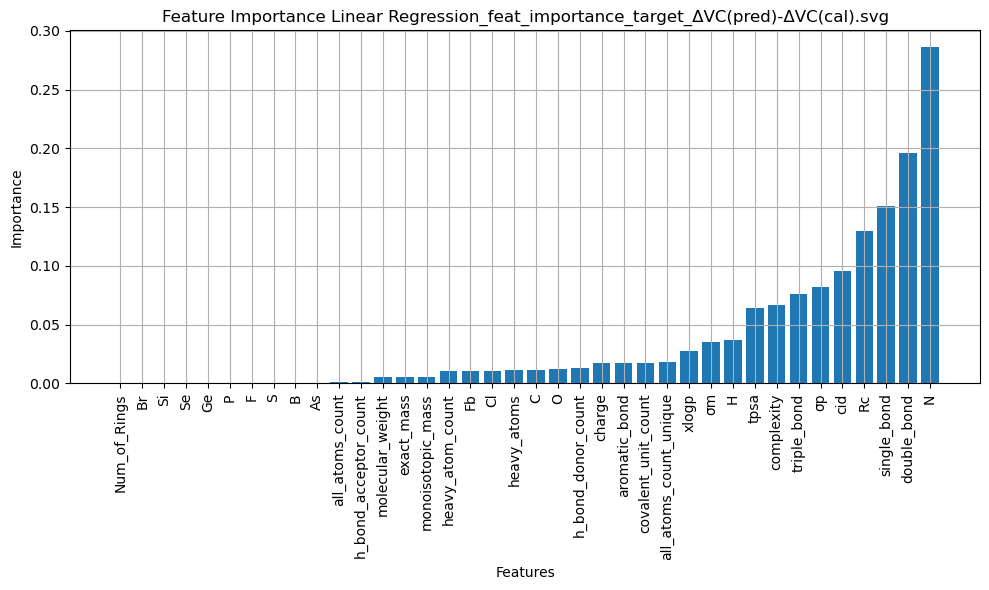

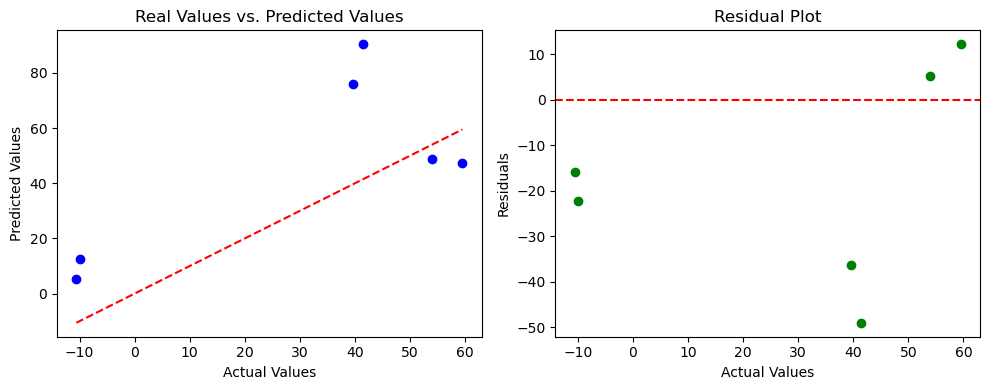

*************** Ridge ***************


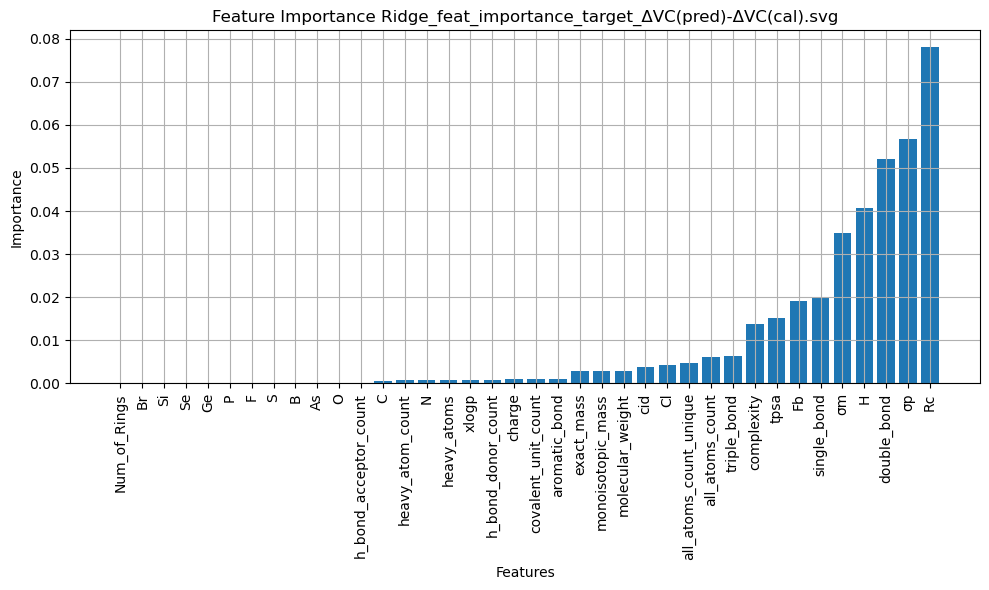

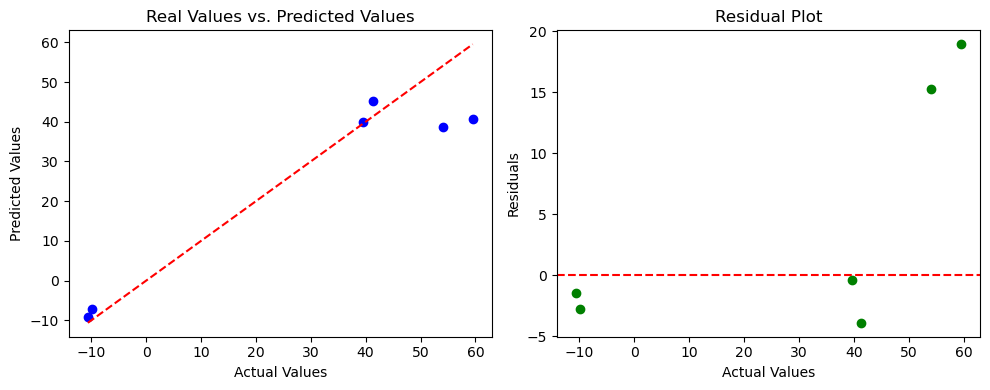

*************** Random Forest ***************


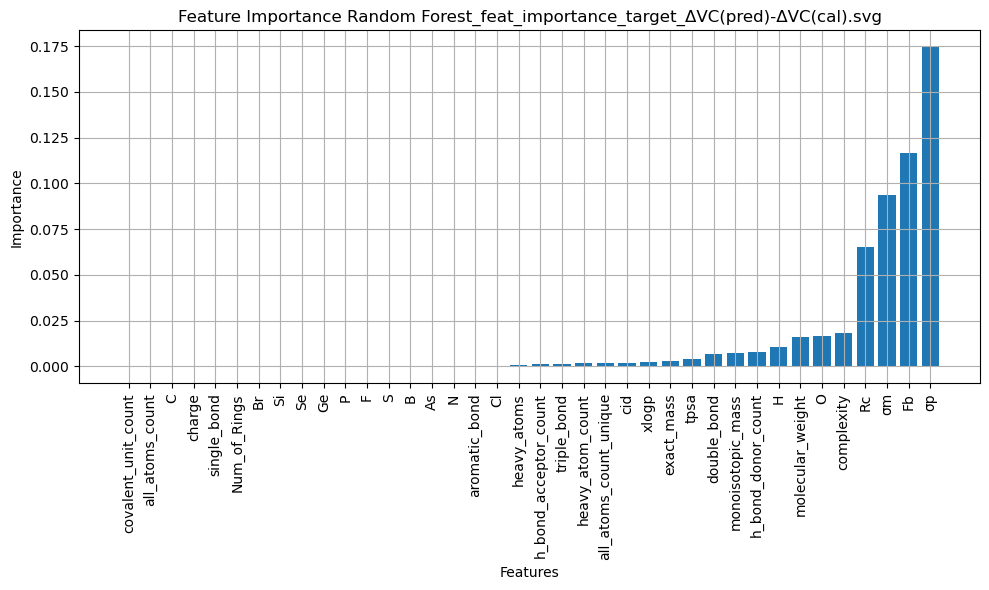

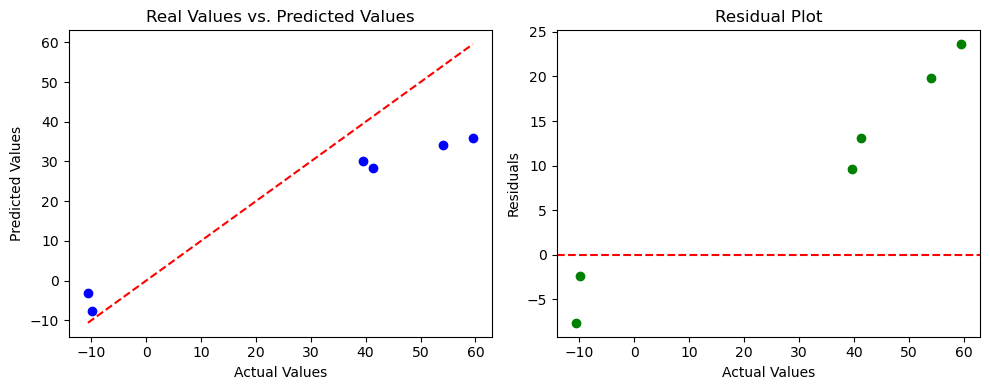

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


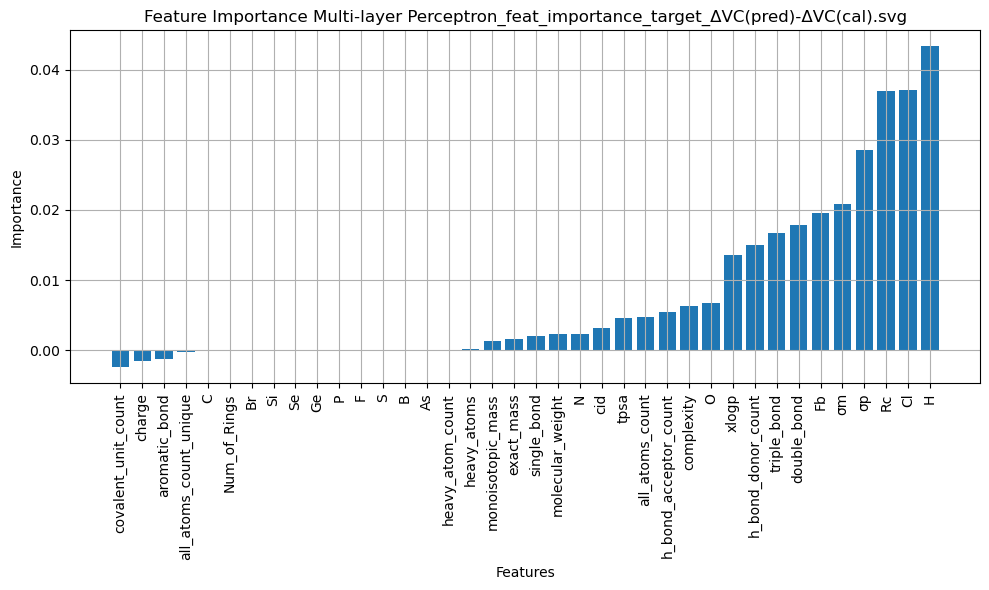

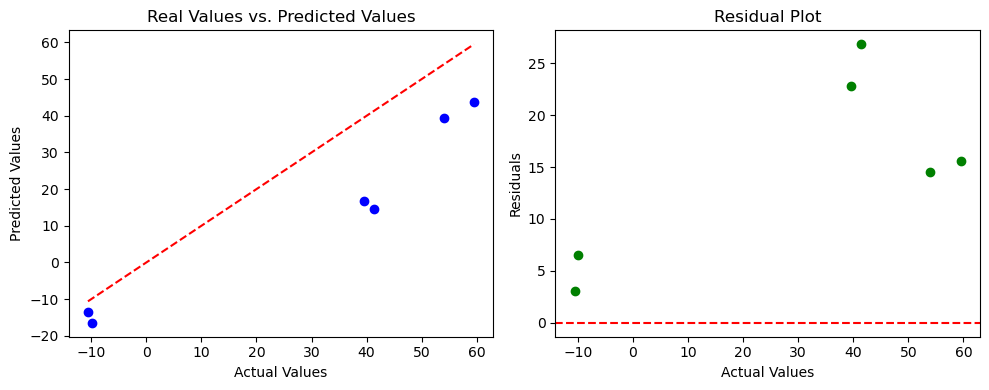

%%%%%%%%%%%%%%% benzene_mean_val %%%%%%%%%%%%%%%

%%%%%%%%%%%%%%% benzene_sum_val %%%%%%%%%%%%%%%
*************** Linear Regression ***************


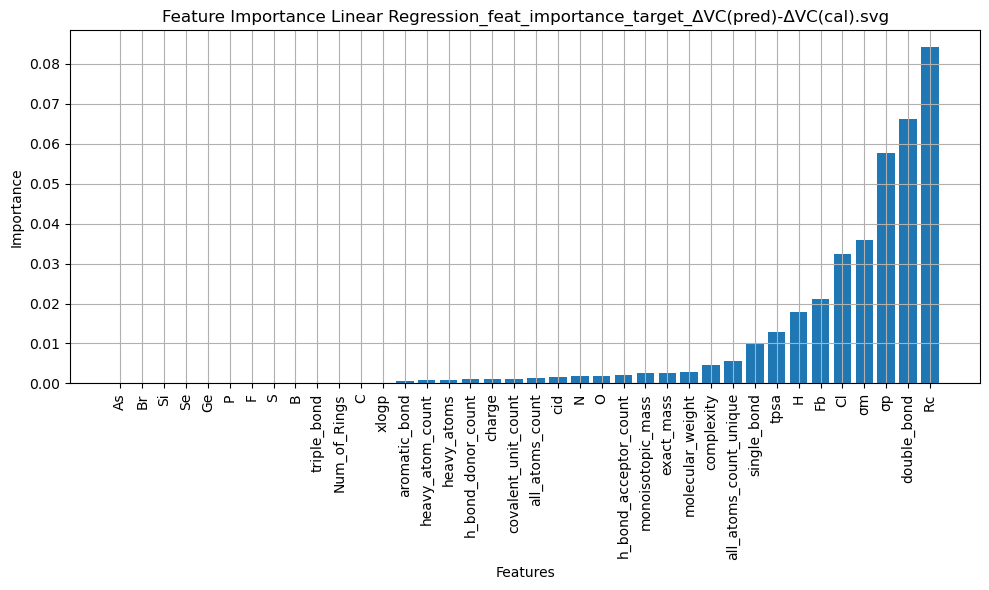

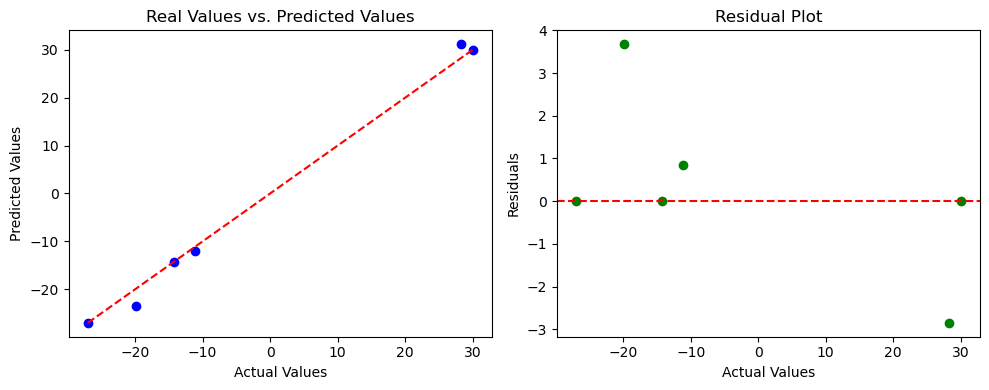

*************** Ridge ***************


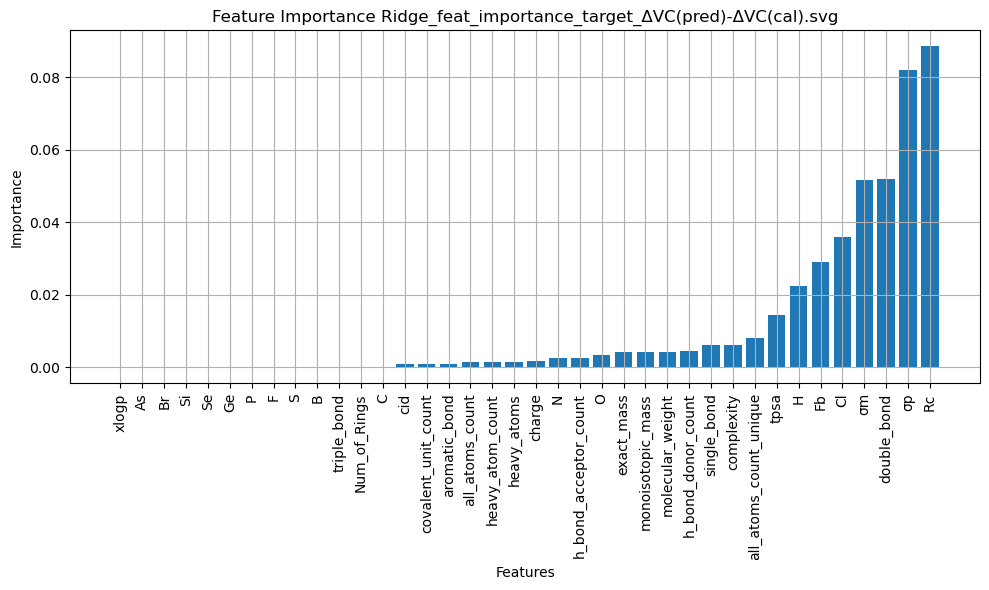

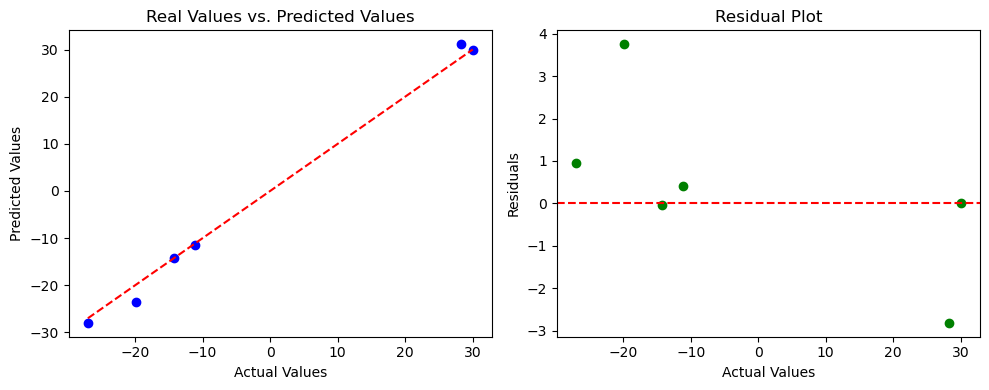

*************** Random Forest ***************


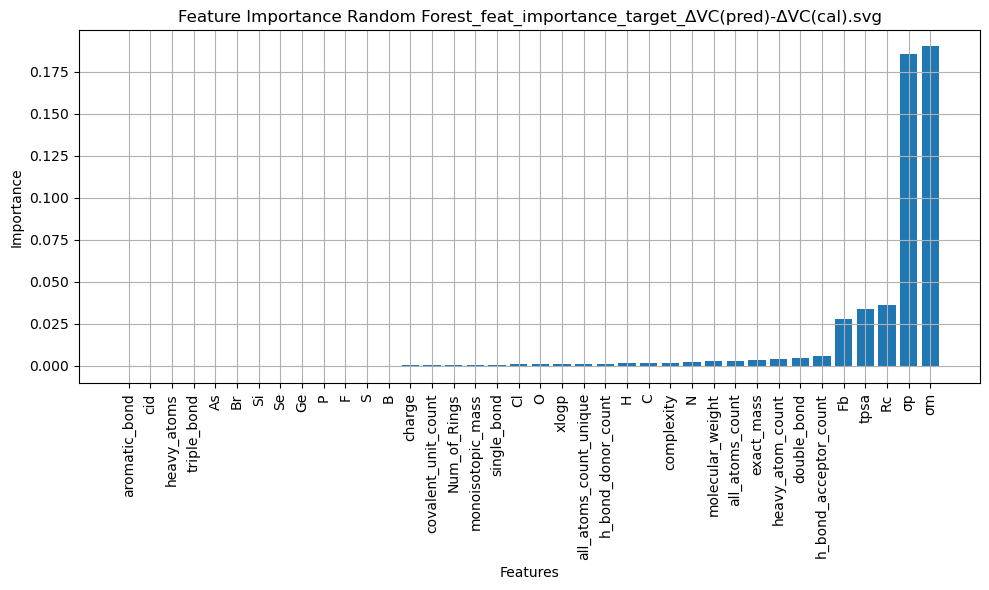

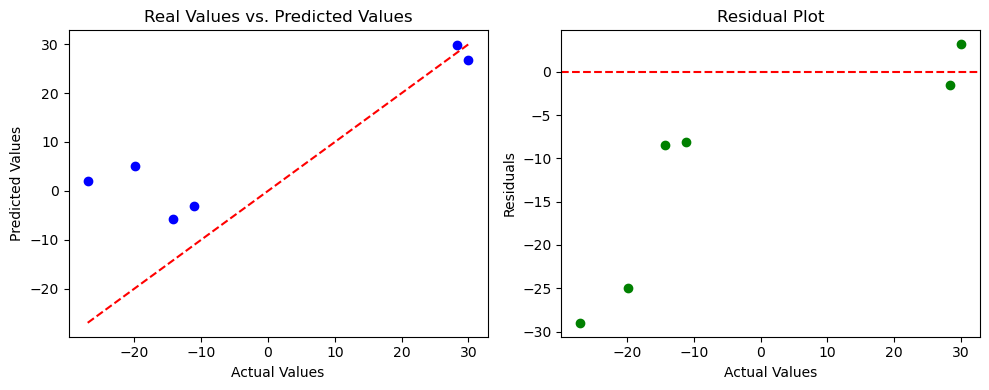

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


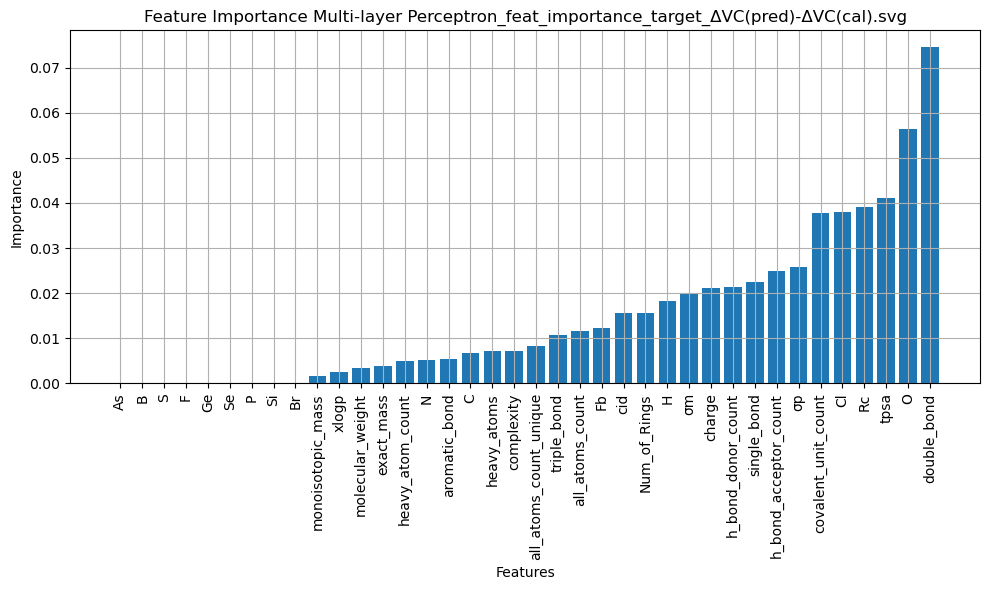

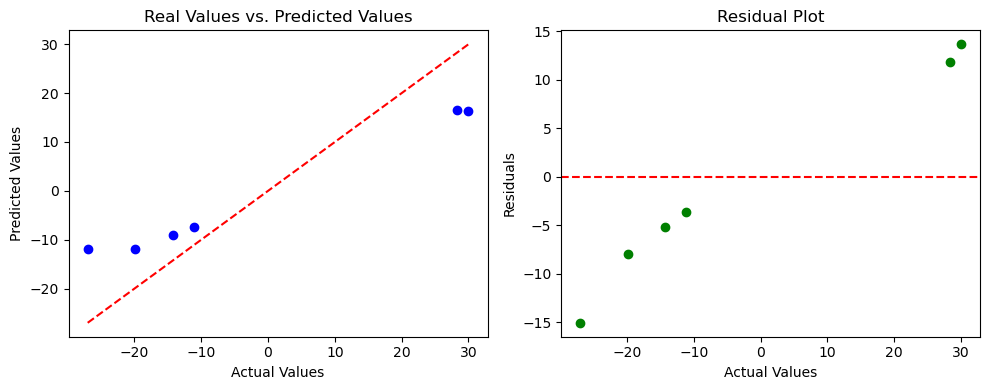

%%%%%%%%%%%%%%% benzene_sum_val %%%%%%%%%%%%%%%

%%%%%%%%%%%%%%% pyridine_mean_val %%%%%%%%%%%%%%%
*************** Linear Regression ***************


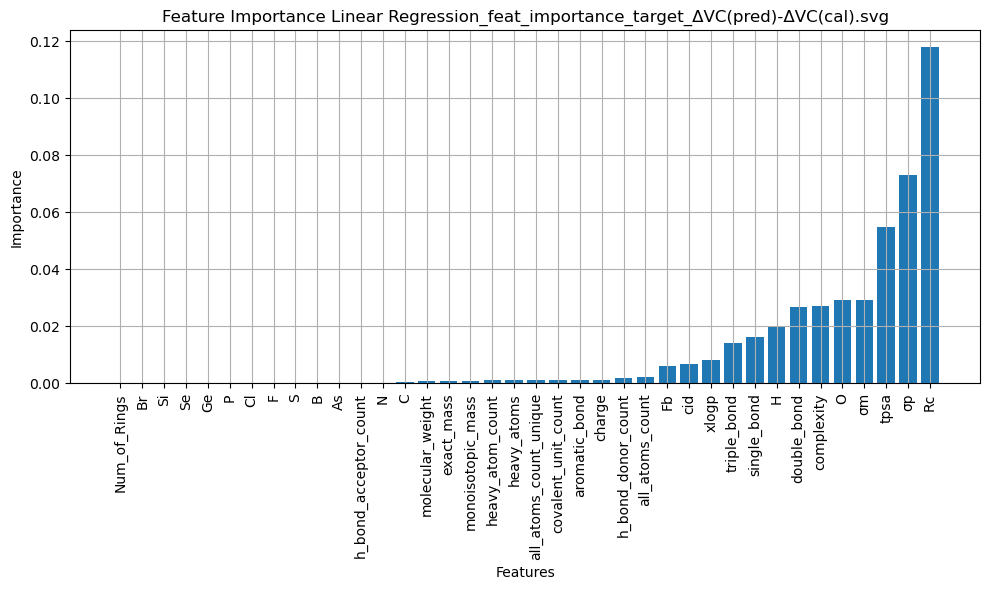

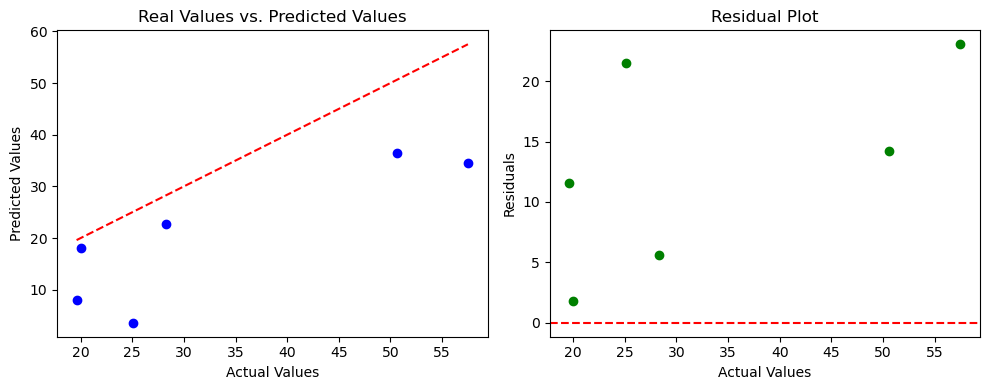

*************** Ridge ***************


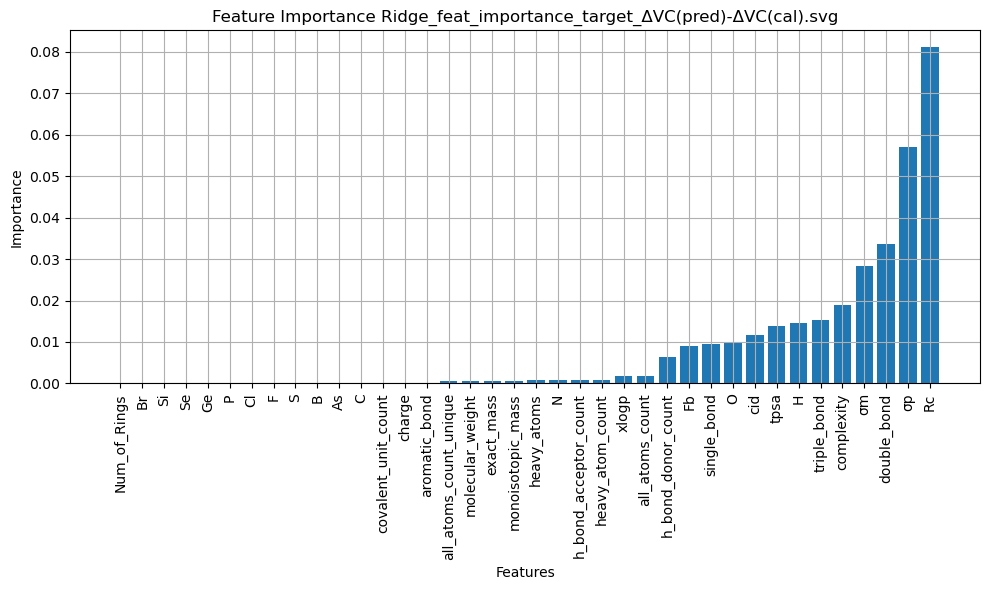

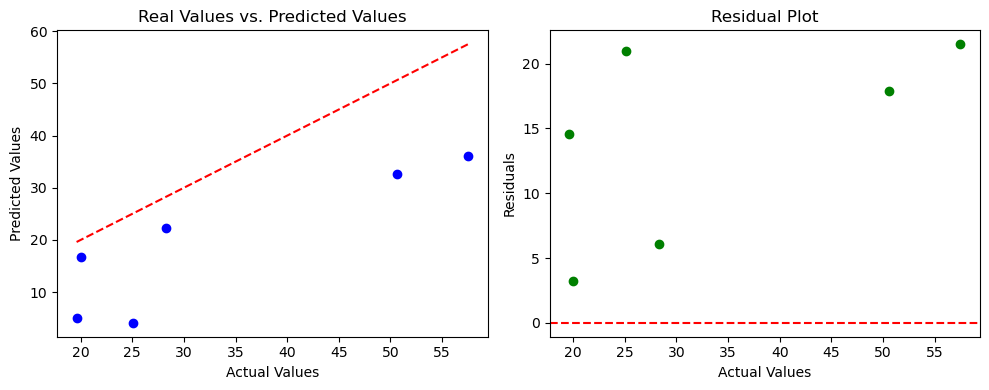

*************** Random Forest ***************


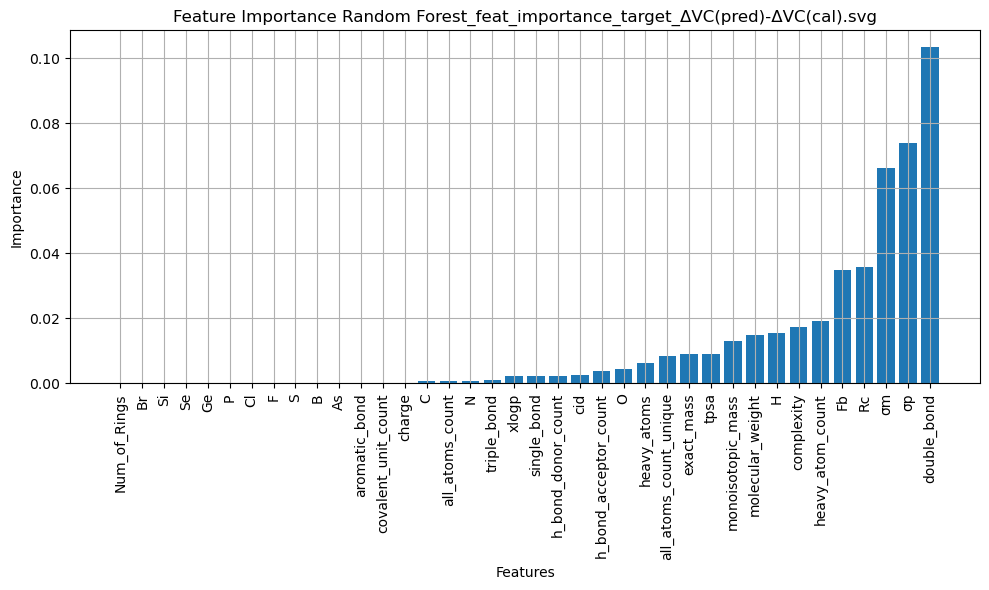

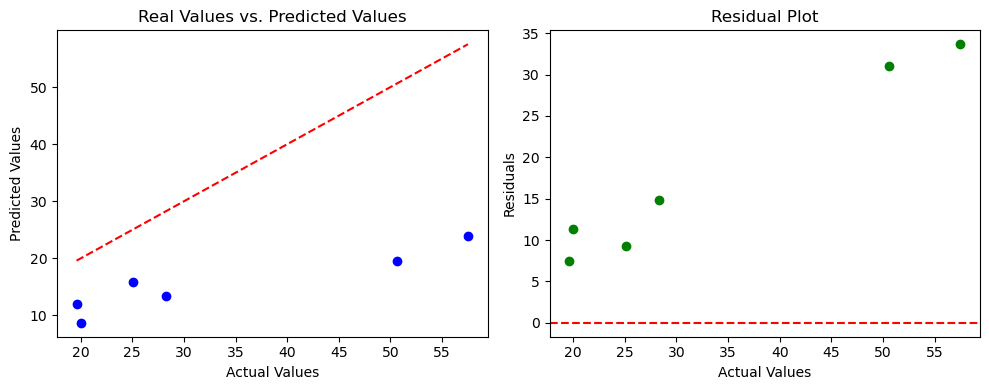

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


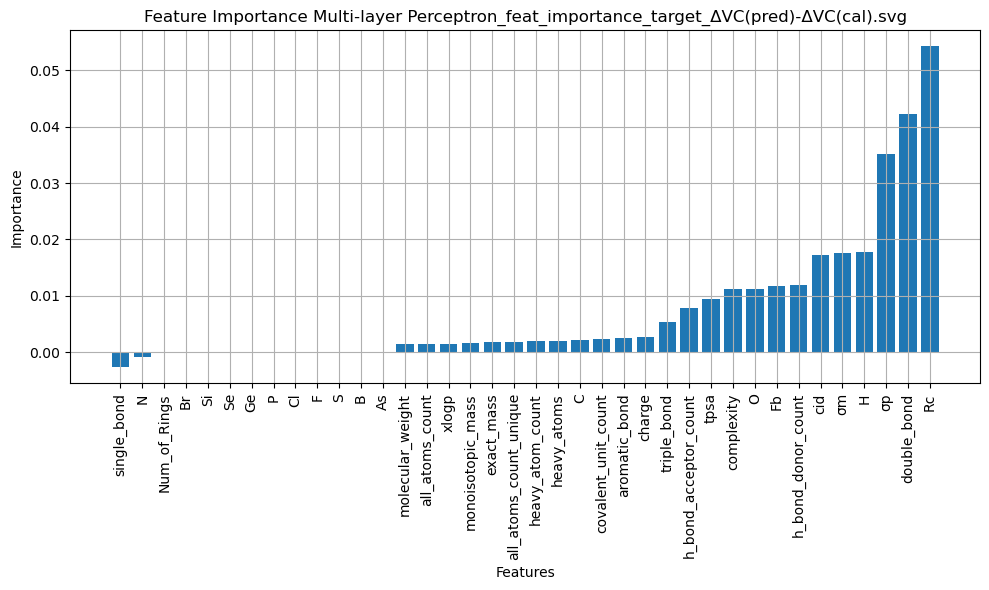

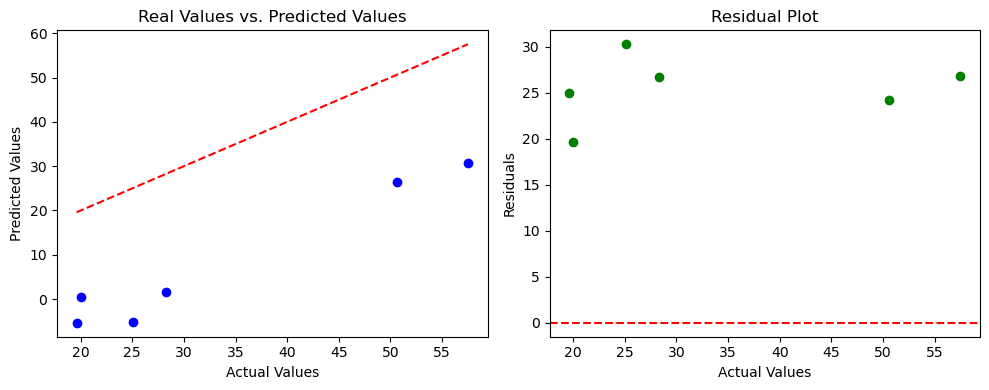

%%%%%%%%%%%%%%% pyridine_mean_val %%%%%%%%%%%%%%%

%%%%%%%%%%%%%%% pyridine_sum_val %%%%%%%%%%%%%%%
*************** Linear Regression ***************


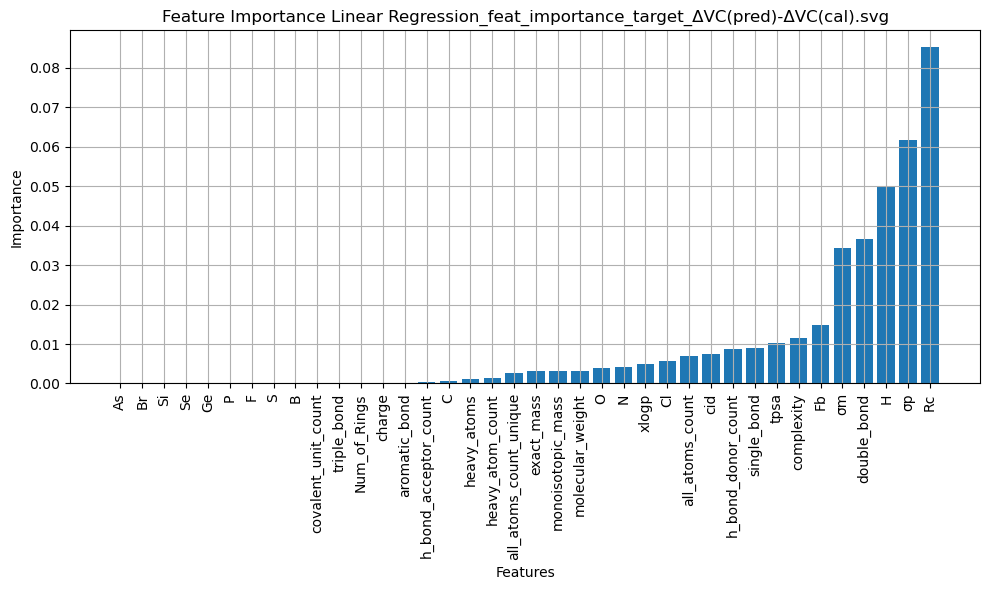

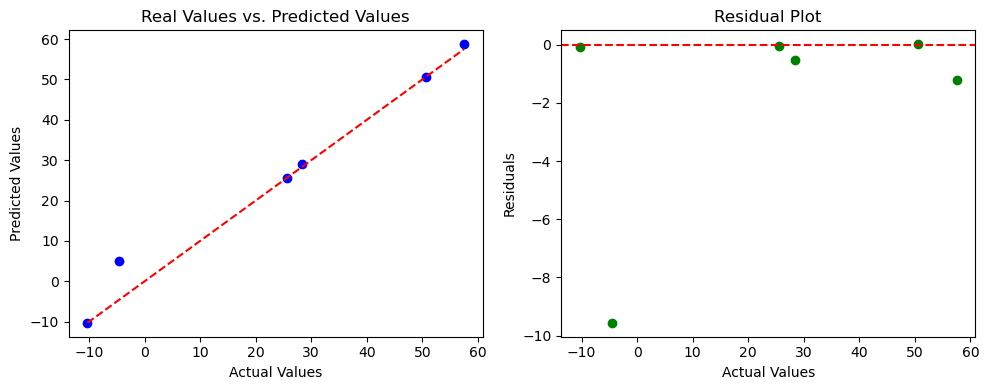

*************** Ridge ***************


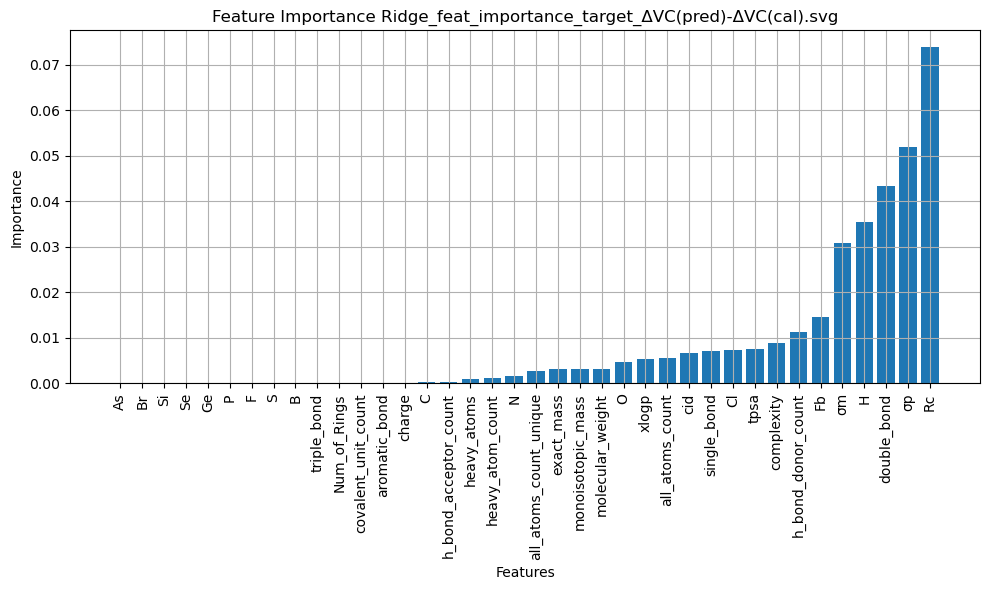

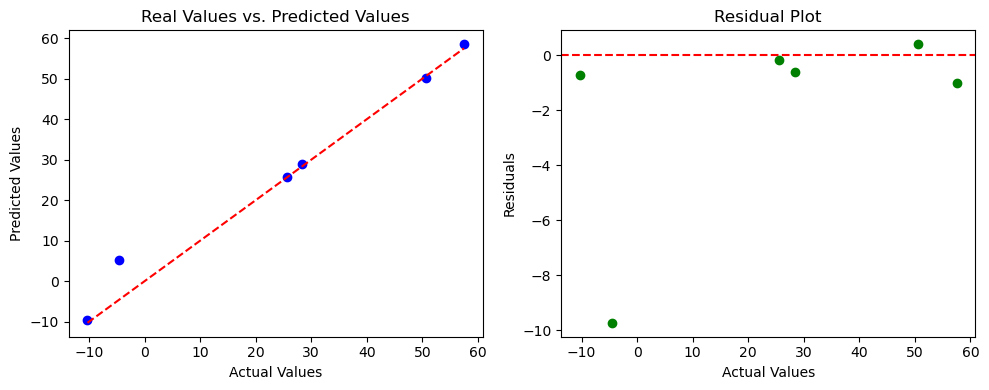

*************** Random Forest ***************


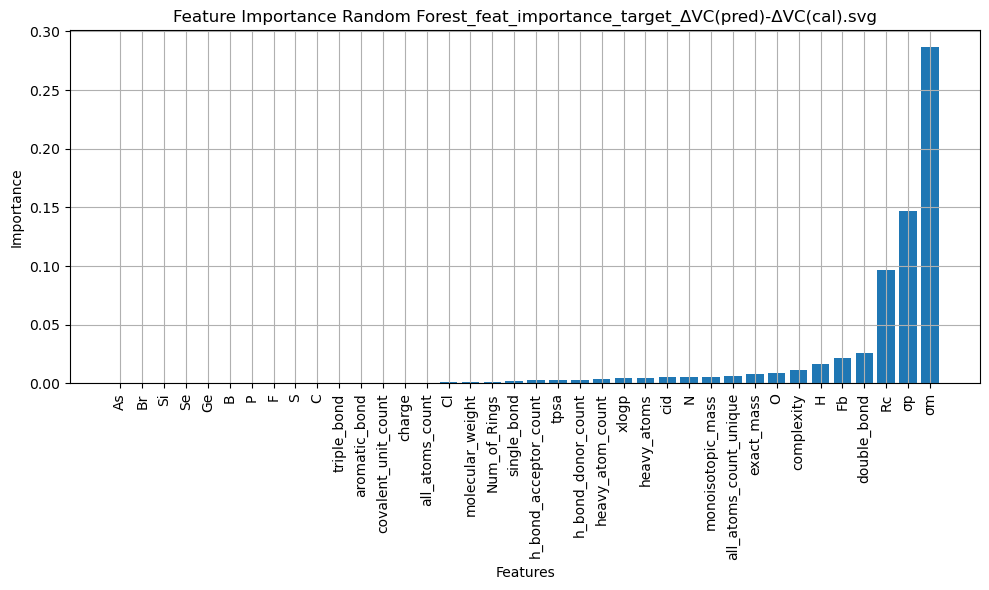

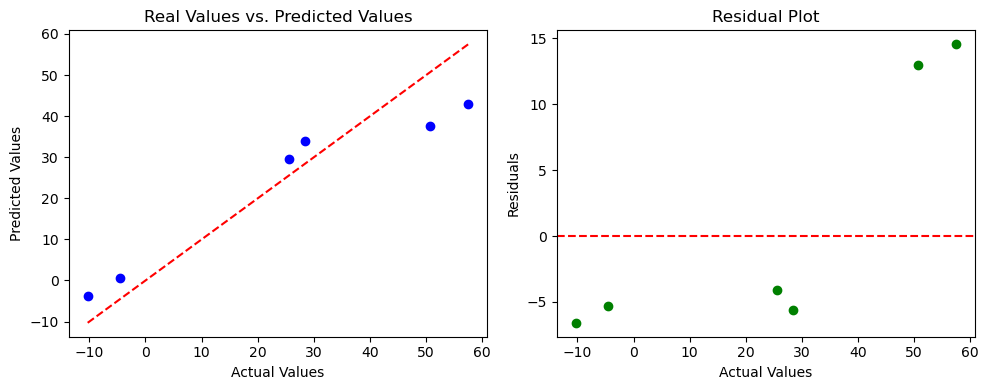

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


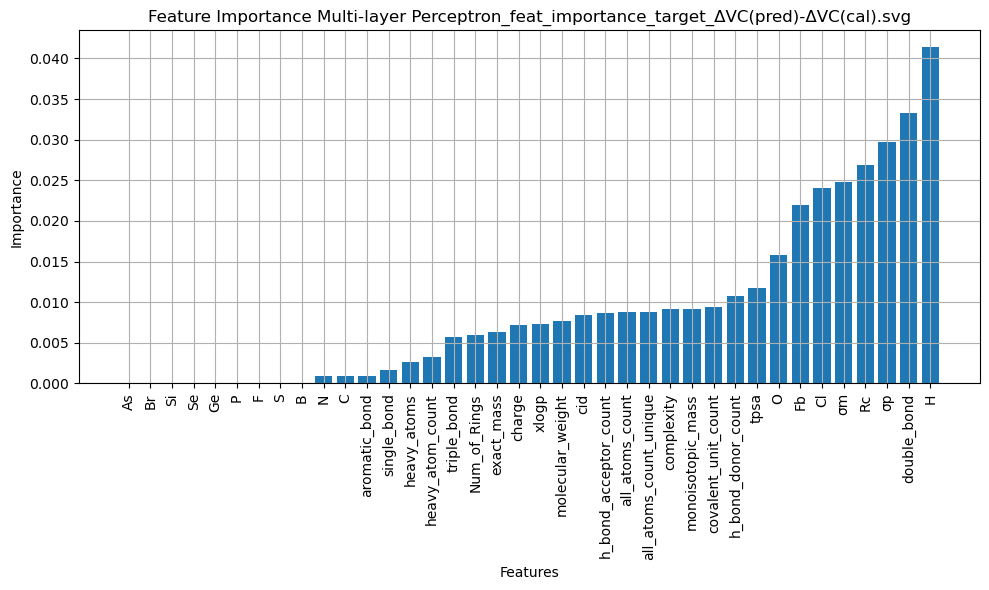

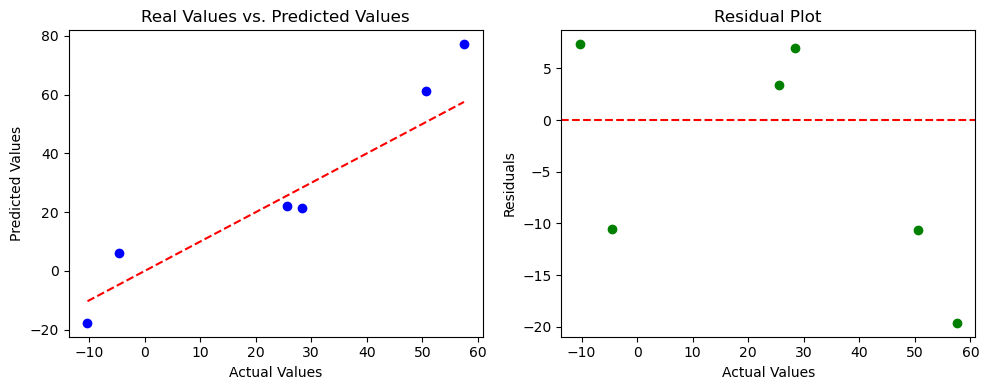

%%%%%%%%%%%%%%% pyridine_sum_val %%%%%%%%%%%%%%%



In [73]:
dict_for_all_the_advanced_analysis_metrics = {} 
for key,data_frame_result in dict_of_dataframe_results.items():
    print ('%'*15,key,'%'*15)
    val_results_df = train_ml_reg_models(data_frame_result)
    print ('%'*15,key,'%'*15)
    dict_for_all_the_advanced_analysis_metrics[key]=val_results_df
    # print (val_results_df)
    print ('='*30)
    print () 


In [76]:
for key,item in dict_for_all_the_advanced_analysis_metrics.items():
    print ('%'*15,key,'%'*15)

    print (item)

%%%%%%%%%%%%%%% benzene_mean_val %%%%%%%%%%%%%%%
                             R^2        MAE         MSE      MAPE      MedAE
Linear Regression       0.030789  23.508366  775.411750  1.026871  19.125395
Ridge                   0.875168   7.109008  102.667214  0.186575   2.663963
Random Forest           0.739952  12.685167  212.997317  0.379778  11.364500
Multi-layer Perceptron  0.640093  14.881345  290.578446  0.450464  15.053874
%%%%%%%%%%%%%%% benzene_sum_val %%%%%%%%%%%%%%%
                             R^2        MAE         MSE      MAPE      MedAE
Linear Regression       0.991508   1.230847    3.729706  0.060466   1.424942
Ridge                   0.991322   1.331812    3.852332  0.060712   1.428169
Random Forest           0.481229  12.531000  268.474970  0.634259   8.262000
Multi-layer Perceptron  0.794099   9.581244  109.852056  0.421857  10.836345
%%%%%%%%%%%%%%% pyridine_mean_val %%%%%%%%%%%%%%%
                             R^2        MAE         MSE      MAPE      MedAE
Linear

In [86]:
df_part2_multisubs = pd.read_csv("../data/additivity_multisubs_part2.csv")
df_part2_multisubs.columns = ['Substituent', 'Pyrene','Pyrene','Butadiene','Butadiene','Butadiyne','Butadiyne'] 


In [87]:
def get_my_dataframe(dataframe, column):
    df_temp = dataframe.loc[1:,['Substituent',column]]
    df_temp.columns = header_default
    df_temp.reset_index(inplace=True)
    return df_temp

In [88]:
columns_of_interest = ['Pyrene','Butadiene','Butadiyne'] 
df_Pyrene =    get_my_dataframe (df_part2_multisubs,columns_of_interest[0])
df_Butadiene = get_my_dataframe (df_part2_multisubs,columns_of_interest[1])
df_Butadiyne = get_my_dataframe (df_part2_multisubs,columns_of_interest[2])

In [89]:
df_Pyrene

index Combination ΔVC(pred) ΔVC(cal)
0       1     NO2,NO2      50.8     51.7
1       2       NC,NC      41.4     41.8
2       3     CHO,CHO      16.2     16.7
3       4       Cl,Cl      44.0     44.1
4       5       OH,OH      40.6     40.6
5       6       Me,Me       3.9      3.9
6       7     OMe,OMe      37.0     37.0
7       8     NH2,NH2      23.0     22.9
8       9      NO2,NC      49.5     50.2
9      10       Cl,OH      45.2     45.1
10     11      Me,NH2      25.3     25.2
11     12       NC,Me      14.4     14.5
12     13     CHO,OMe      45.8     45.6

In [91]:
df_Pyrene["Combination_split"] = df_Pyrene["Combination"].apply( lambda x: x.split(","))
df_Butadiene["Combination_split"] = df_Butadiene["Combination"].apply( lambda x: x.split(","))
df_Butadiyne["Combination_split"] = df_Butadiyne["Combination"].apply( lambda x: x.split(","))

In [94]:
df_Pyrene_mean_values_results , df_Pyrene_sum_values_results= data_cleaning_and_wrangling(dataframe=df_Pyrene)
df_Butadiene_mean_values_results , df_Butadiene_sum_values_results= data_cleaning_and_wrangling(dataframe=df_Butadiene)
df_Butadiyne_mean_values_results , df_Butadiyne_sum_values_results= data_cleaning_and_wrangling(dataframe=df_Butadiyne)

In [95]:
dict_of_dataframe_results = {'Pyrene_mean_val':df_Pyrene_mean_values_results ,
                              'Pyrene_sum_val':df_Pyrene_sum_values_results ,
                              'Butadiene_mean_val':df_Butadiene_mean_values_results , 
                              'Butadiene_sum_val':df_Butadiene_sum_values_results,
                              'Butadiyne_mean_val':df_Butadiyne_mean_values_results,
                              'Butadiyne_sum_val':df_Butadiyne_sum_values_results
                              }

%%%%%%%%%%%%%%% Pyrene_mean_val %%%%%%%%%%%%%%%
*************** Linear Regression ***************


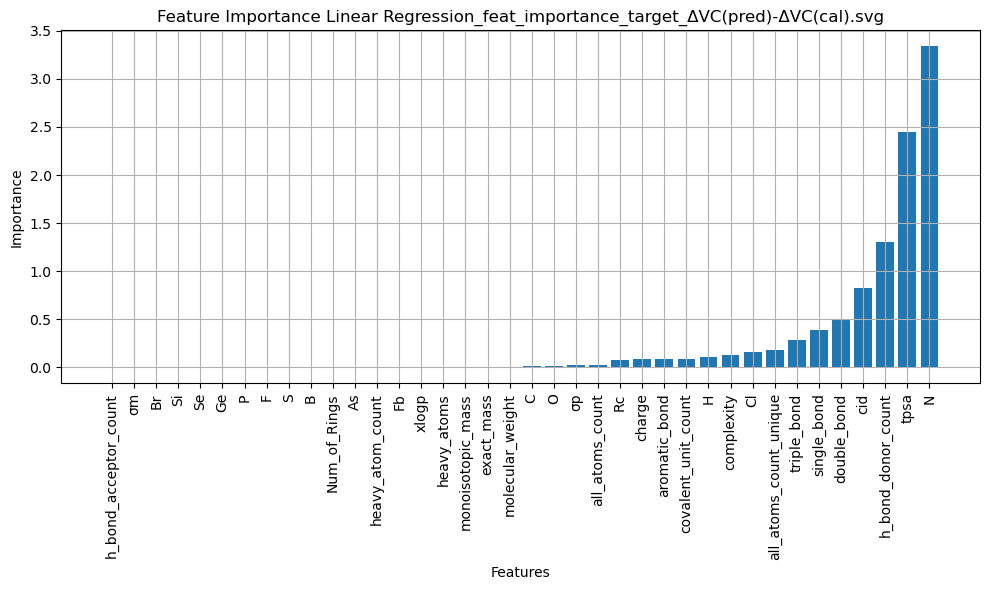

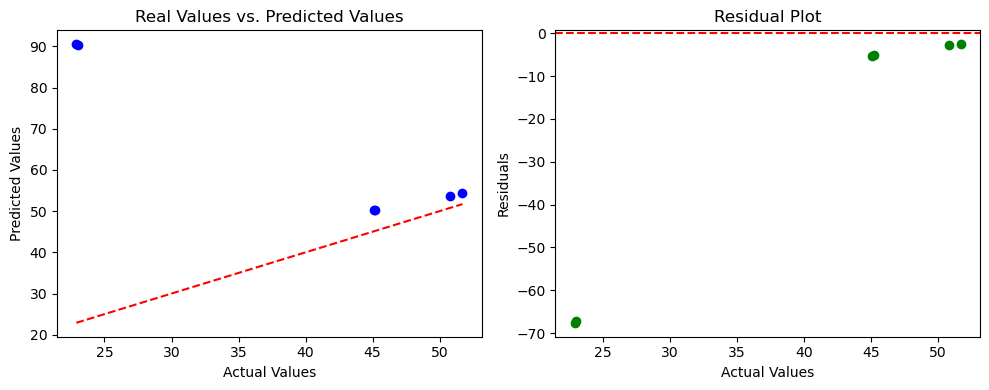

*************** Ridge ***************


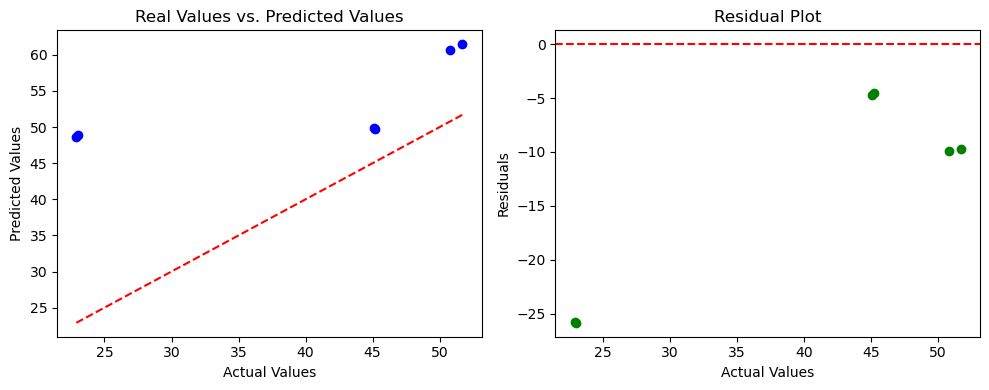

*************** Random Forest ***************


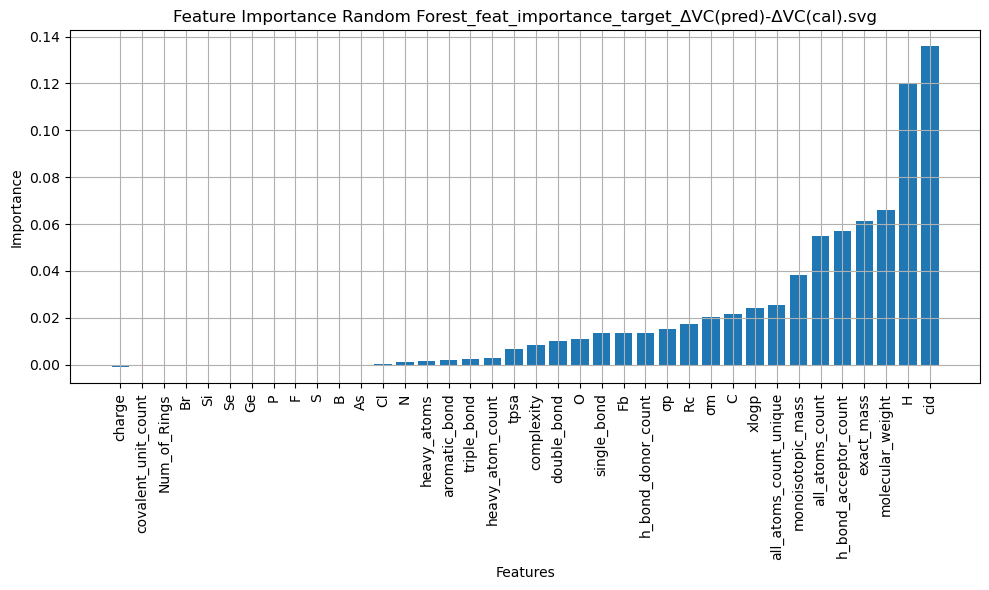

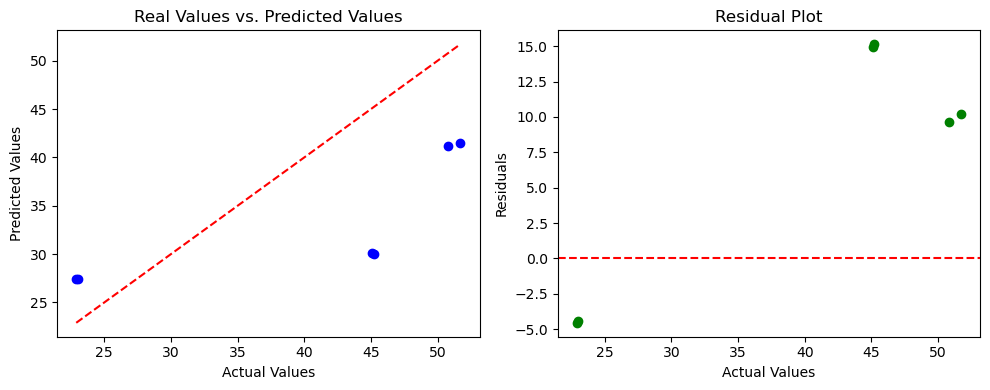

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


%%%%%%%%%%%%%%% Pyrene_mean_val %%%%%%%%%%%%%%%

%%%%%%%%%%%%%%% Pyrene_sum_val %%%%%%%%%%%%%%%
*************** Linear Regression ***************


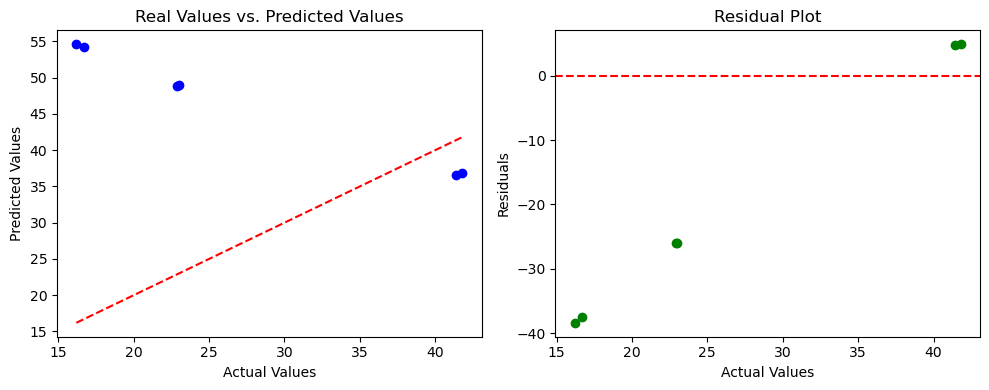

*************** Ridge ***************


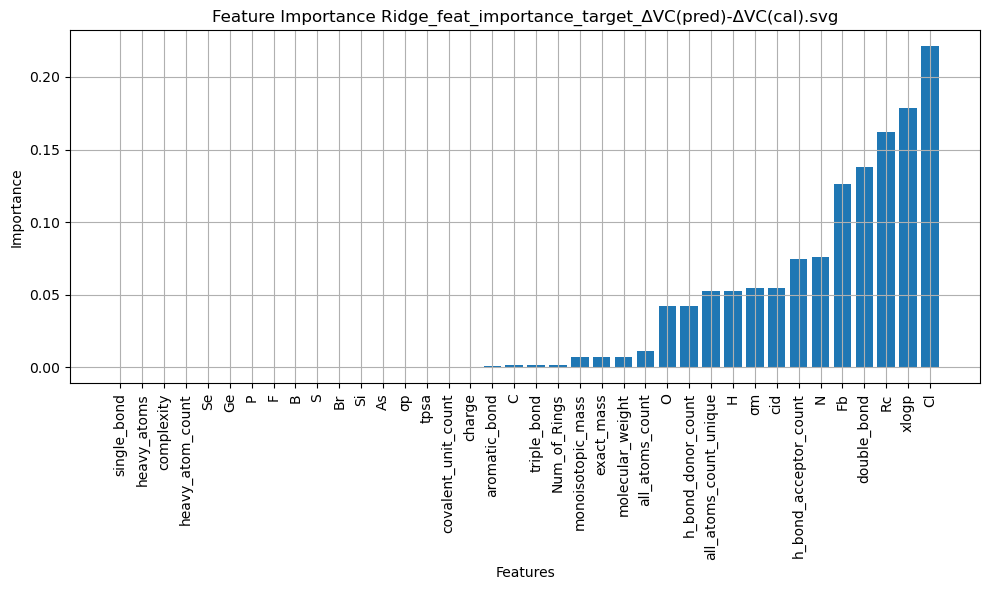

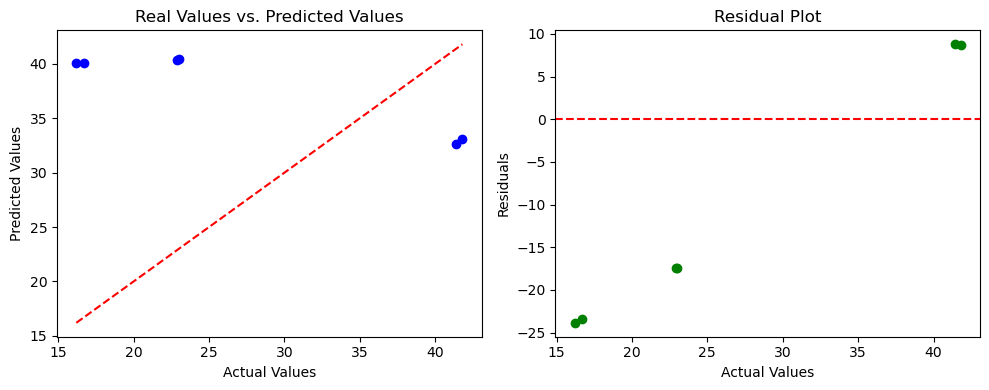

*************** Random Forest ***************


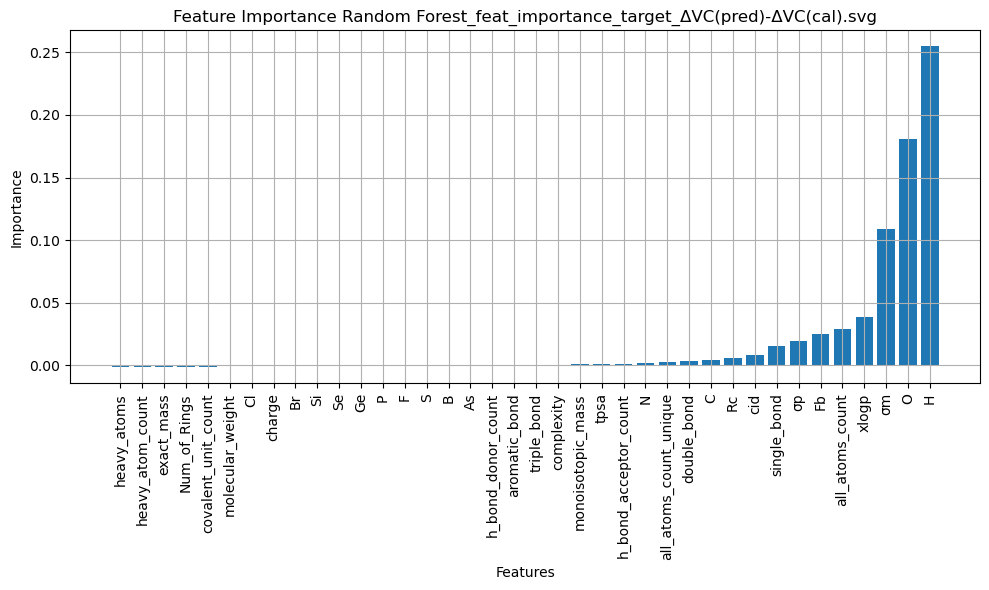

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


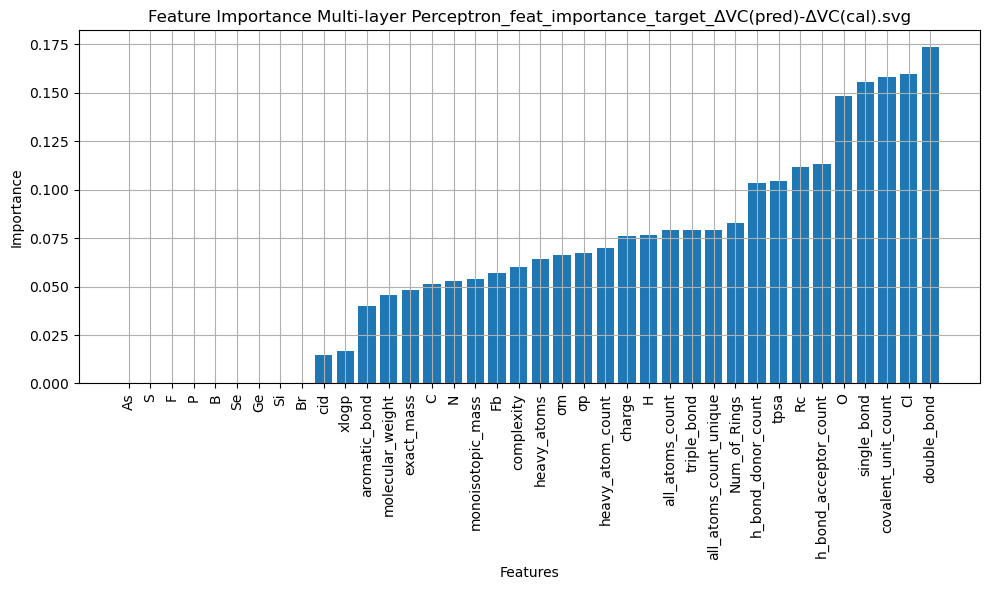

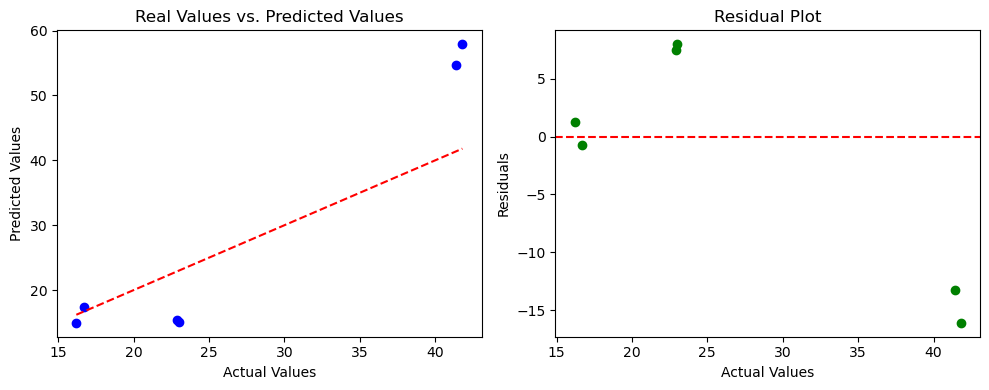

%%%%%%%%%%%%%%% Pyrene_sum_val %%%%%%%%%%%%%%%

%%%%%%%%%%%%%%% Butadiene_mean_val %%%%%%%%%%%%%%%
*************** Linear Regression ***************


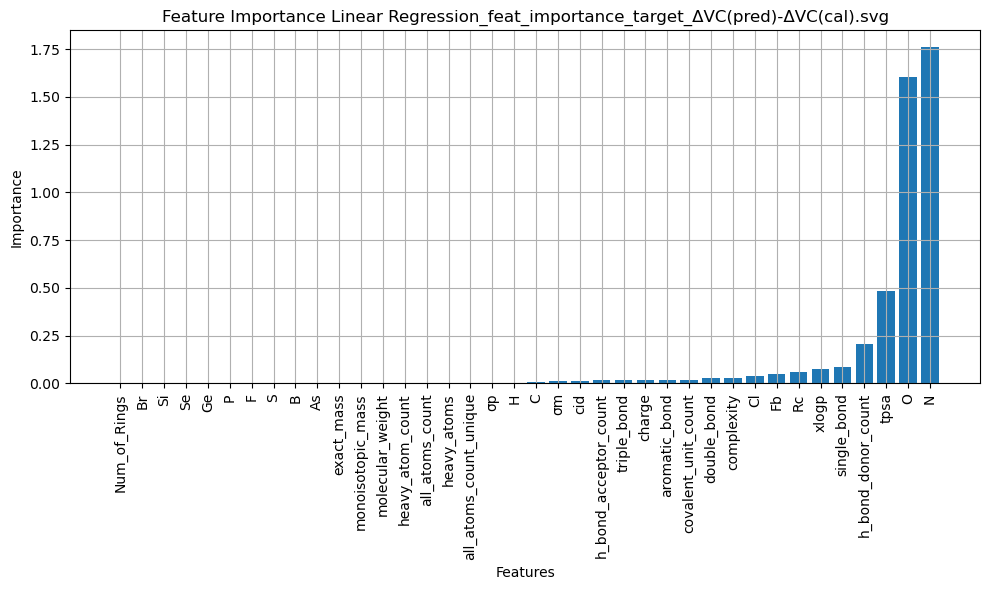

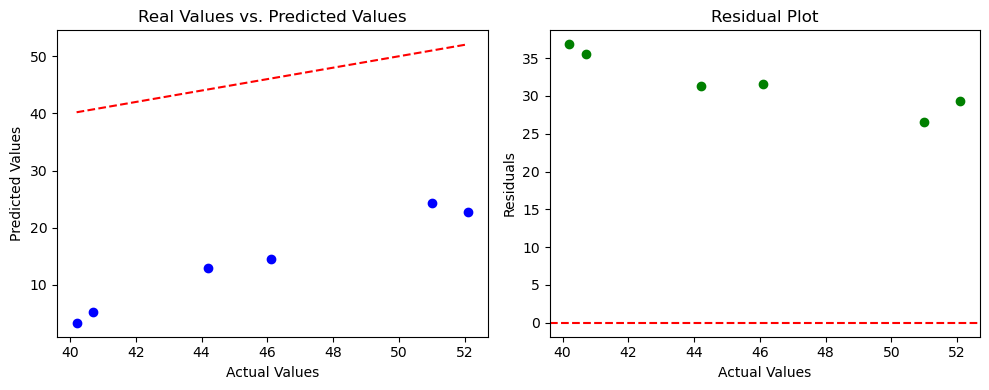

*************** Ridge ***************


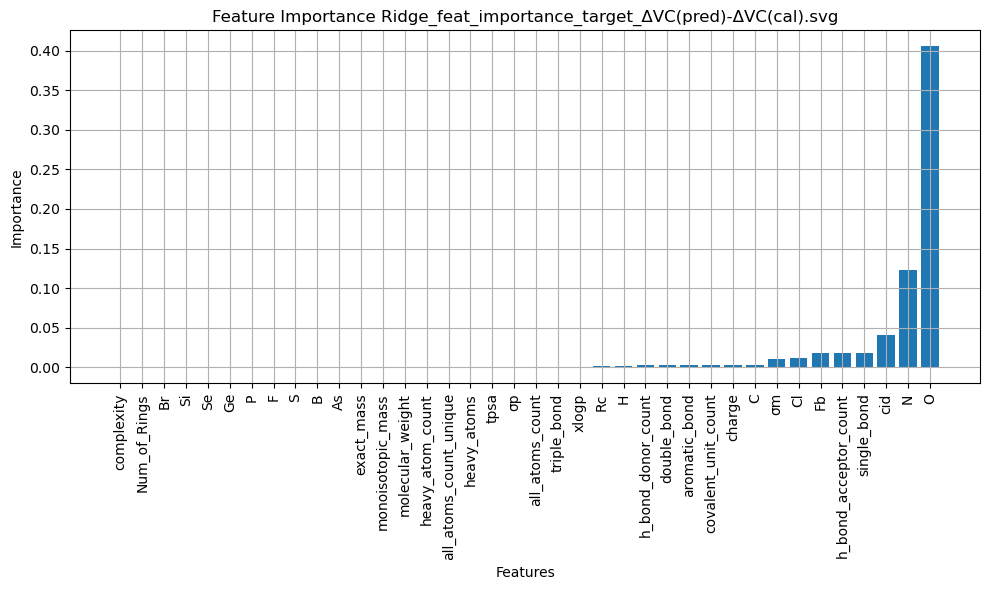

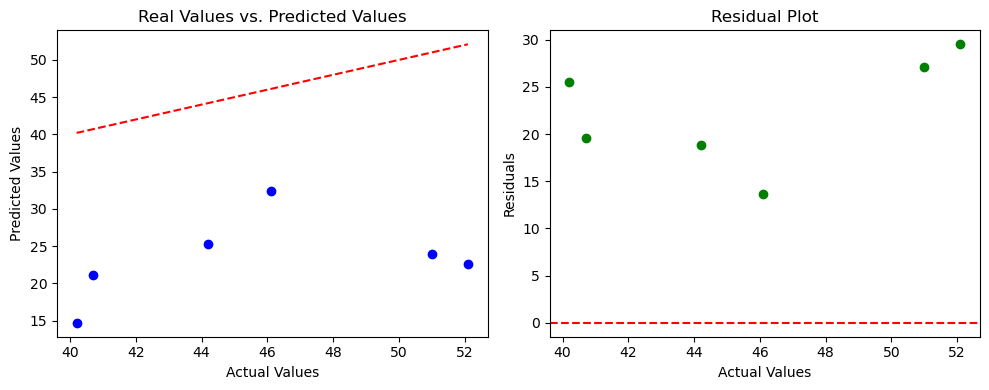

*************** Random Forest ***************


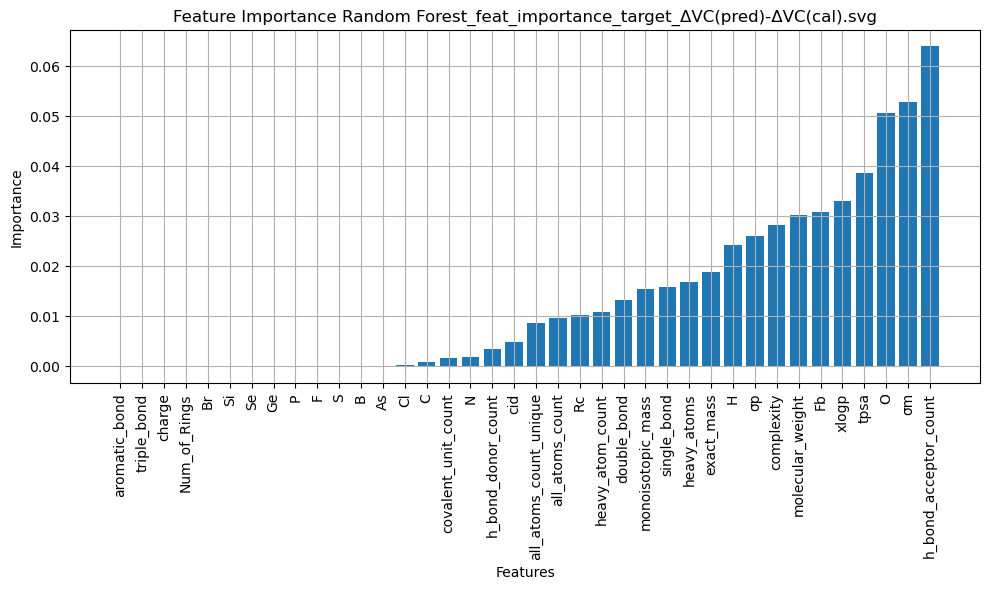

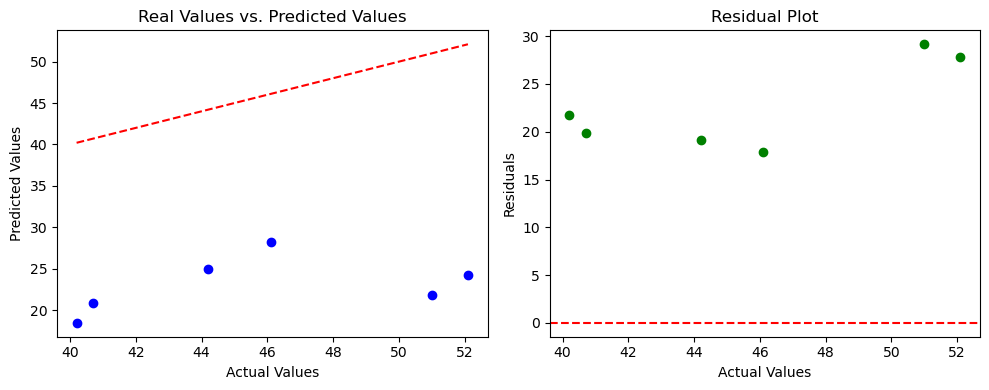

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


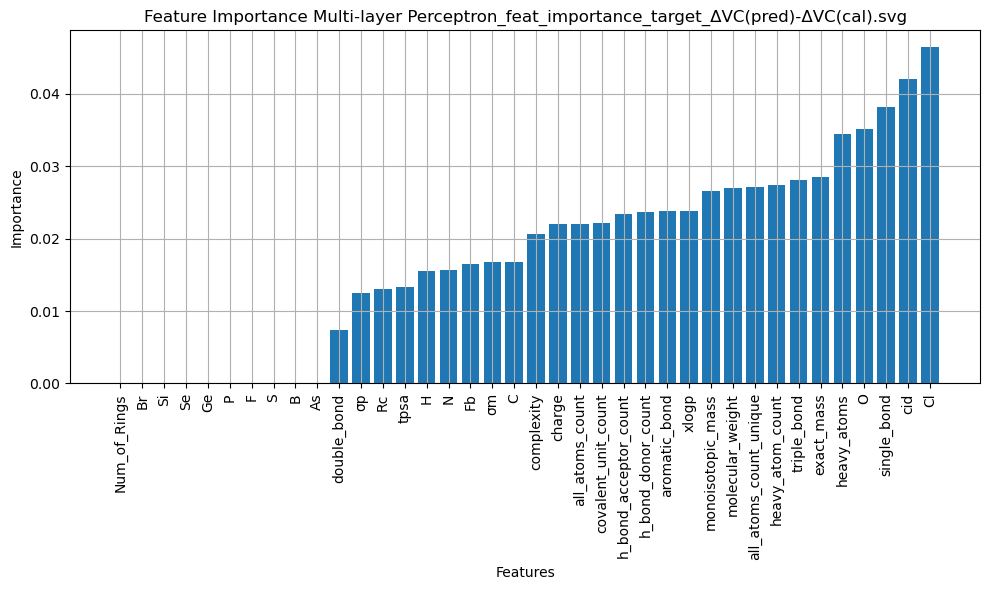

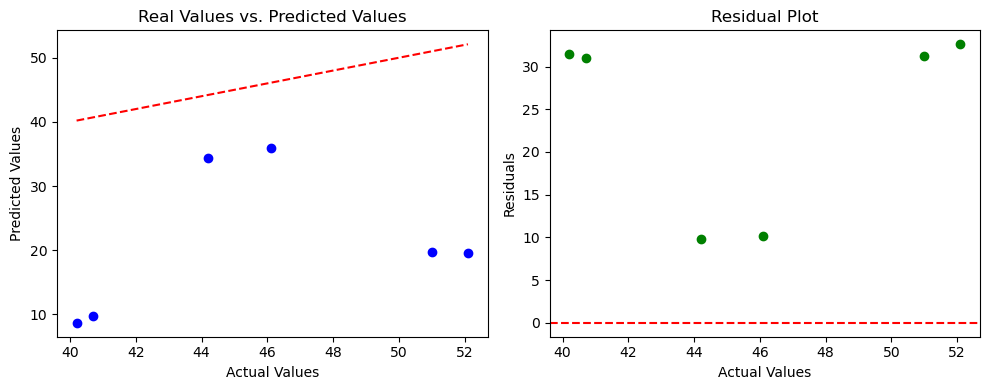

%%%%%%%%%%%%%%% Butadiene_mean_val %%%%%%%%%%%%%%%

%%%%%%%%%%%%%%% Butadiene_sum_val %%%%%%%%%%%%%%%
*************** Linear Regression ***************


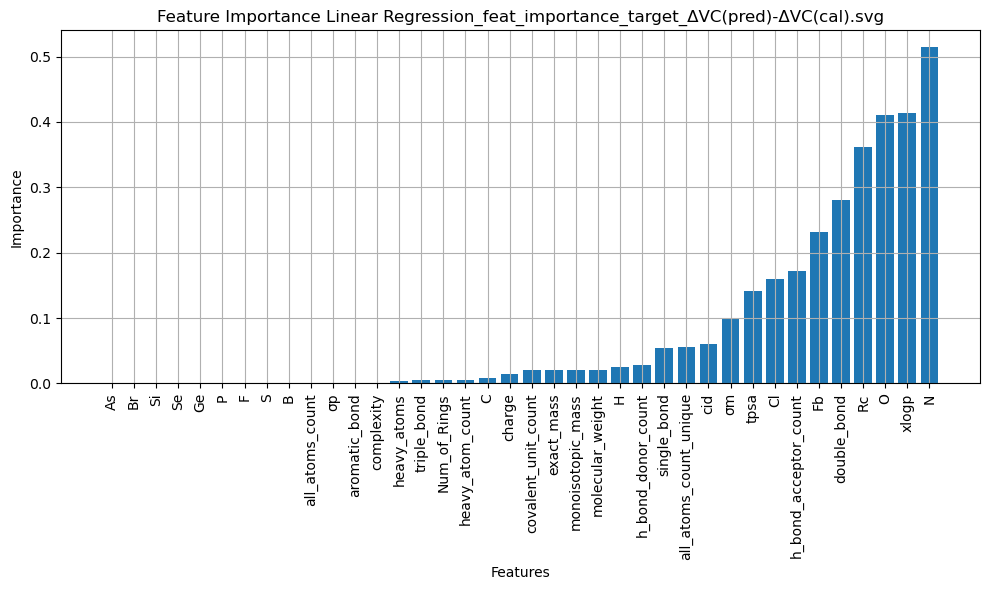

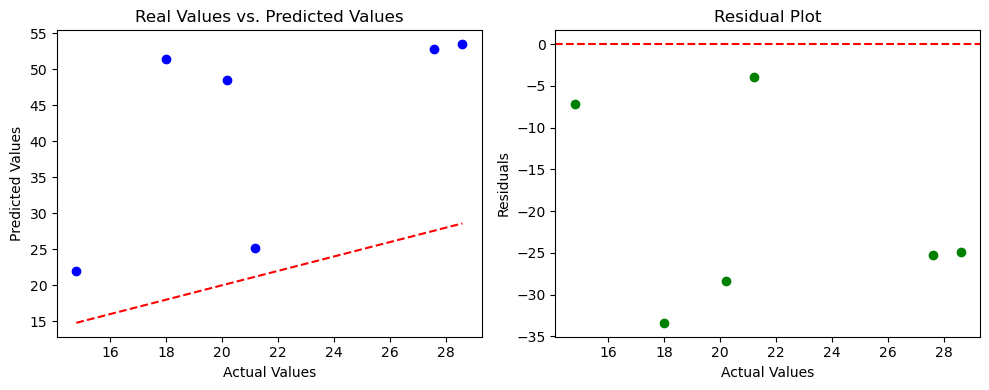

*************** Ridge ***************


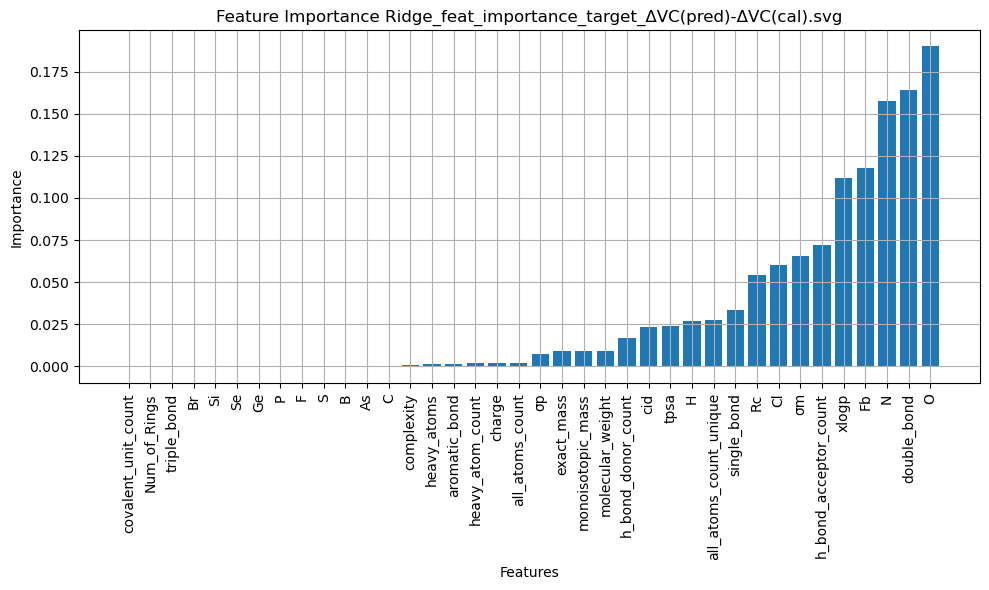

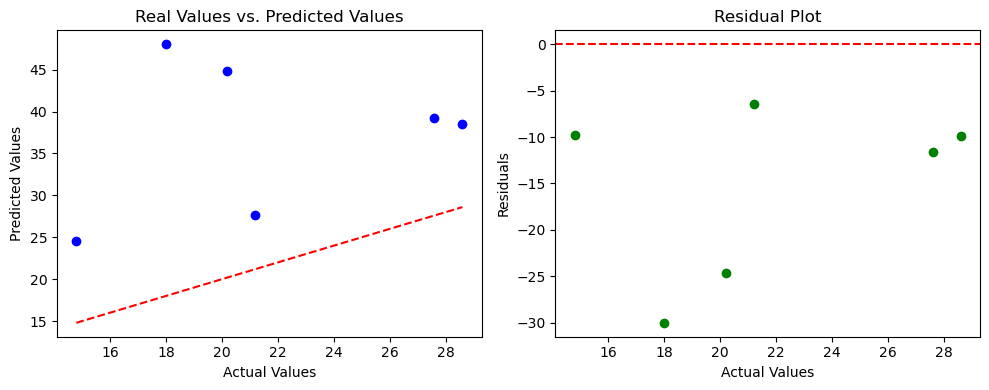

*************** Random Forest ***************


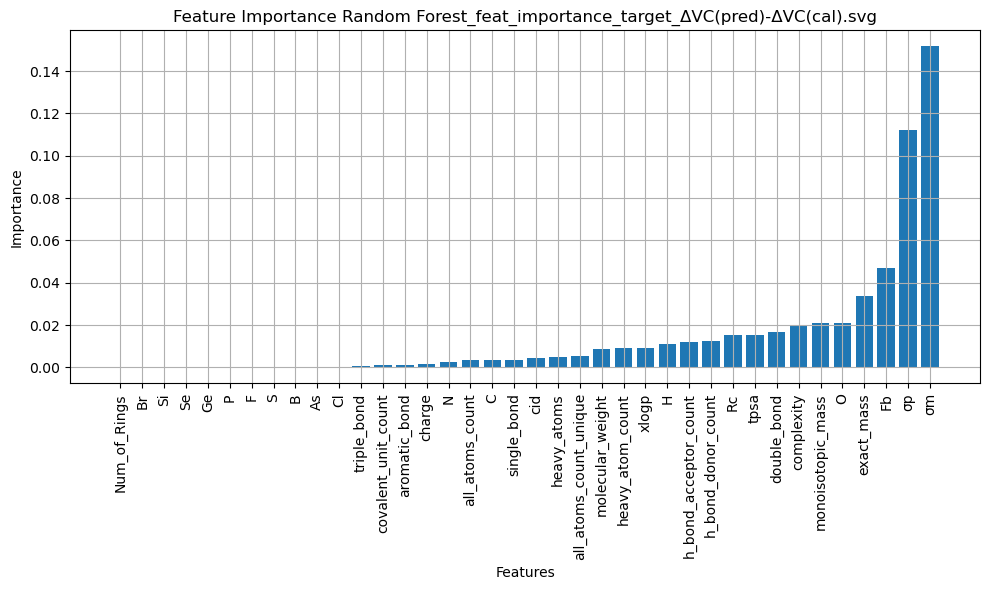

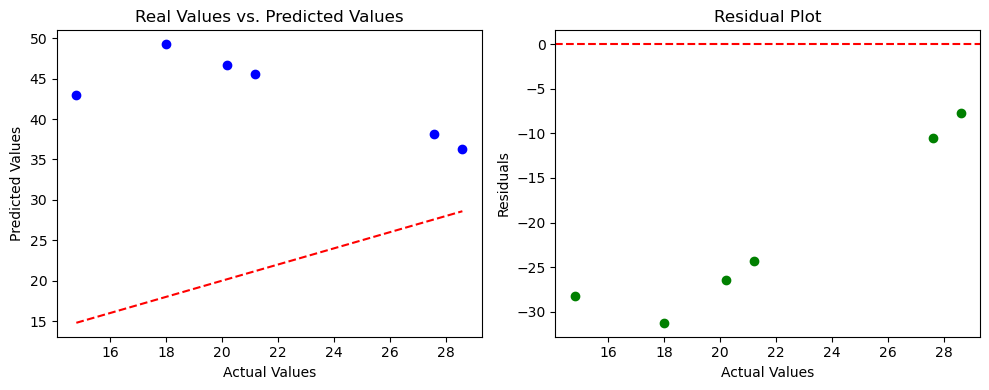

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


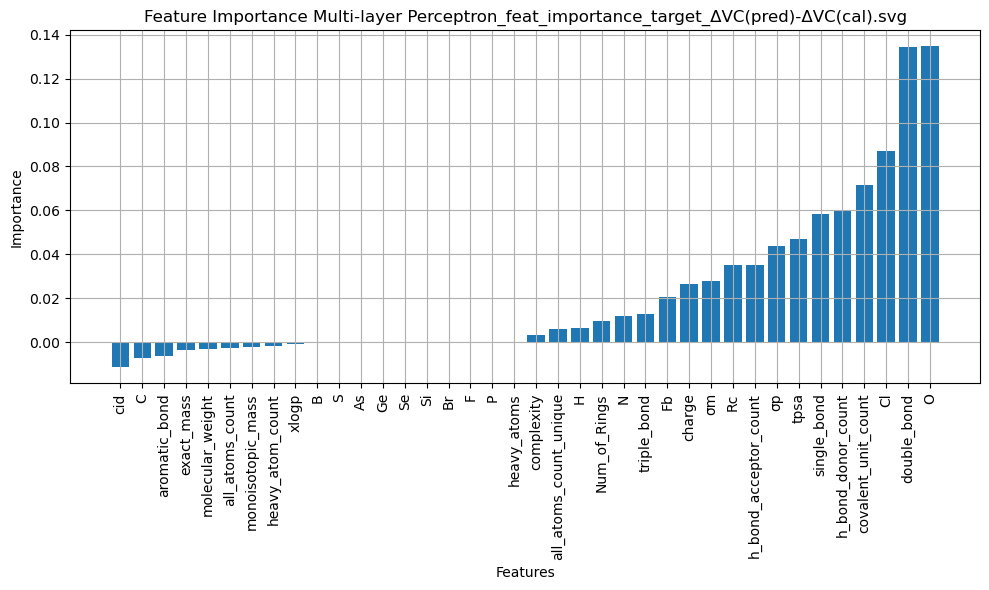

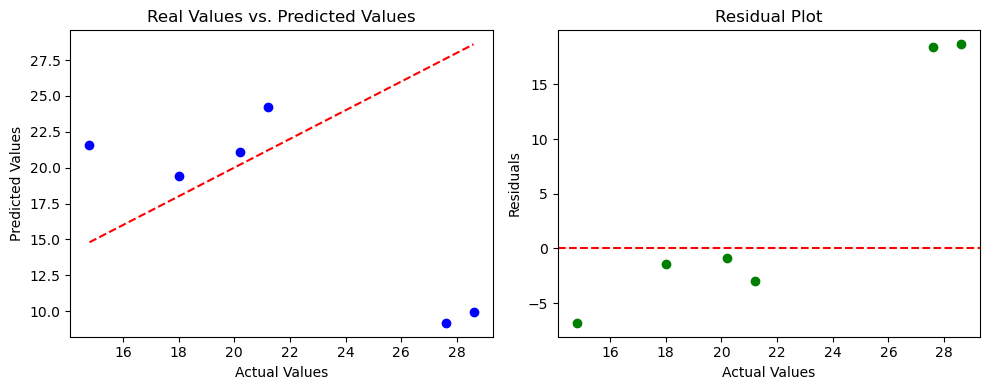

%%%%%%%%%%%%%%% Butadiene_sum_val %%%%%%%%%%%%%%%

%%%%%%%%%%%%%%% Butadiyne_mean_val %%%%%%%%%%%%%%%
*************** Linear Regression ***************


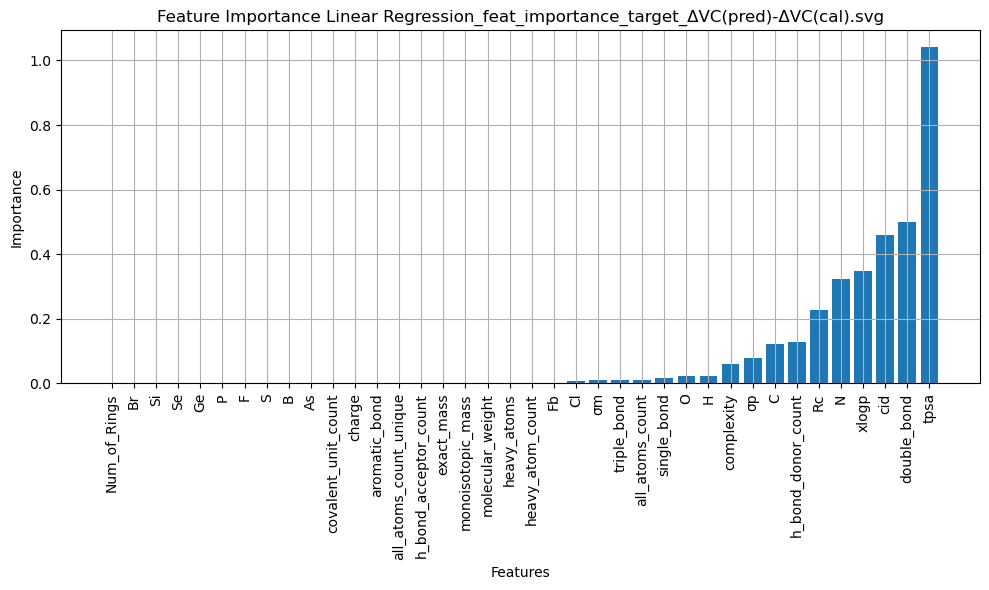

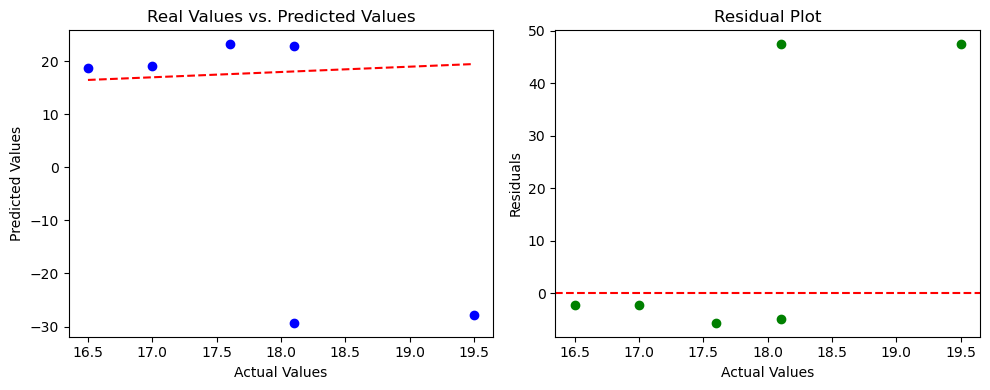

*************** Ridge ***************


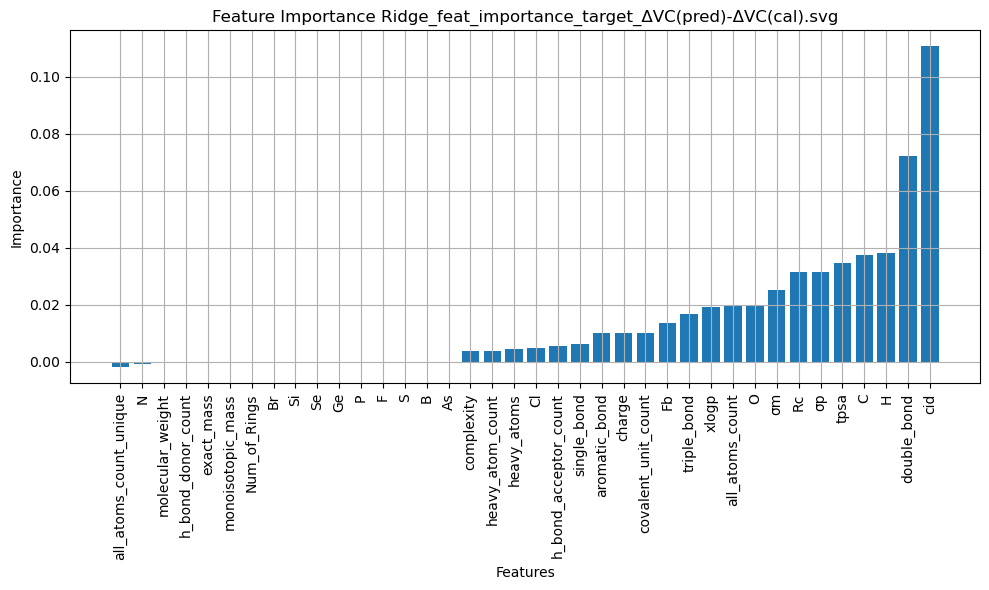

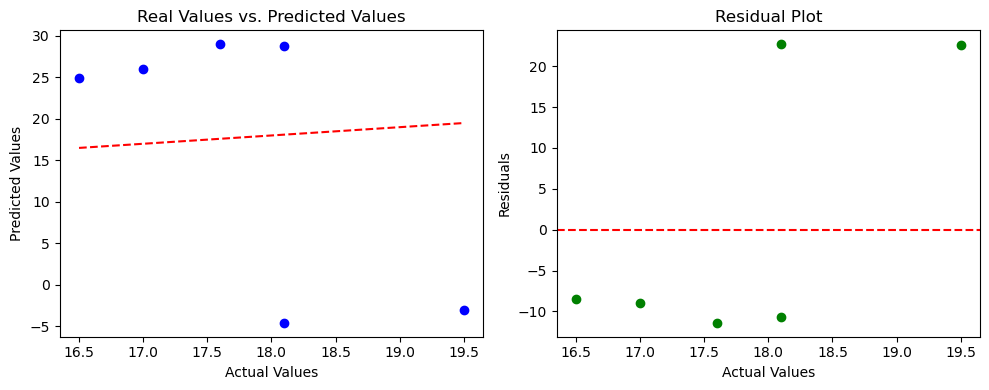

*************** Random Forest ***************


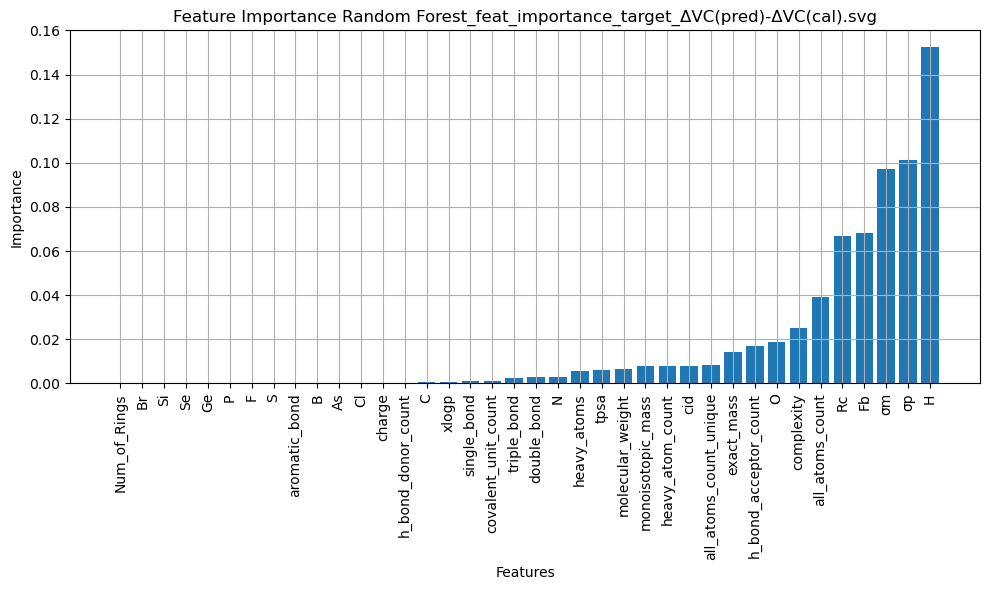

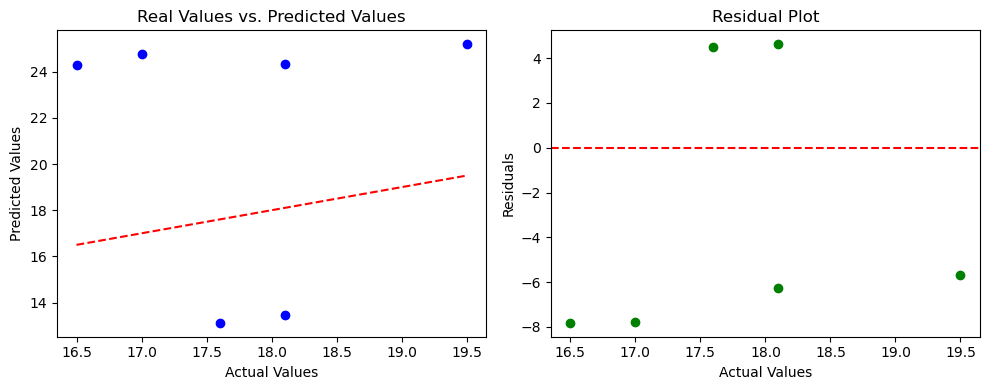

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


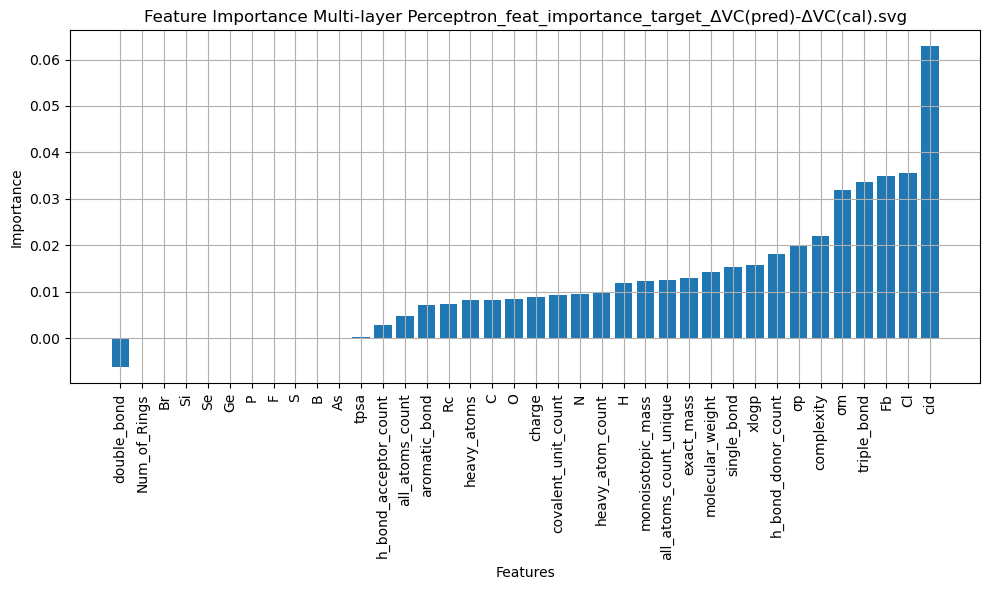

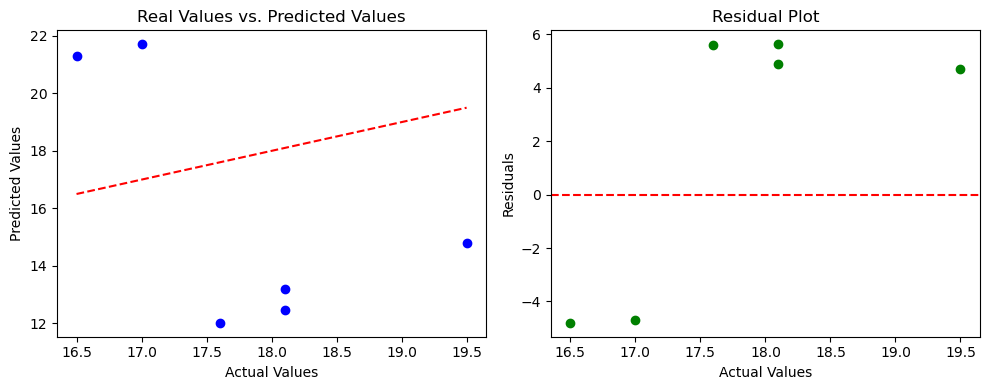

%%%%%%%%%%%%%%% Butadiyne_mean_val %%%%%%%%%%%%%%%

%%%%%%%%%%%%%%% Butadiyne_sum_val %%%%%%%%%%%%%%%
*************** Linear Regression ***************


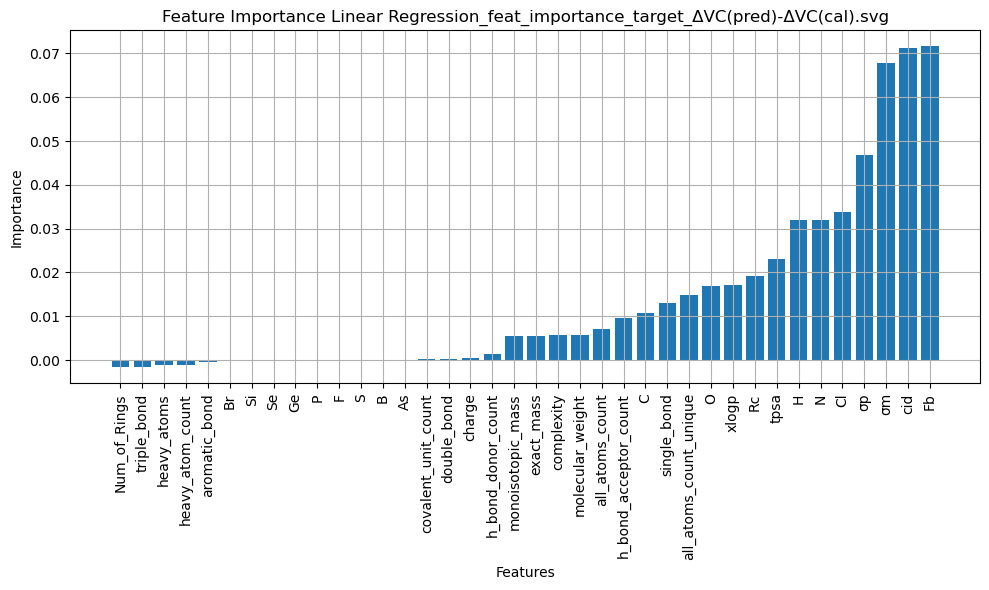

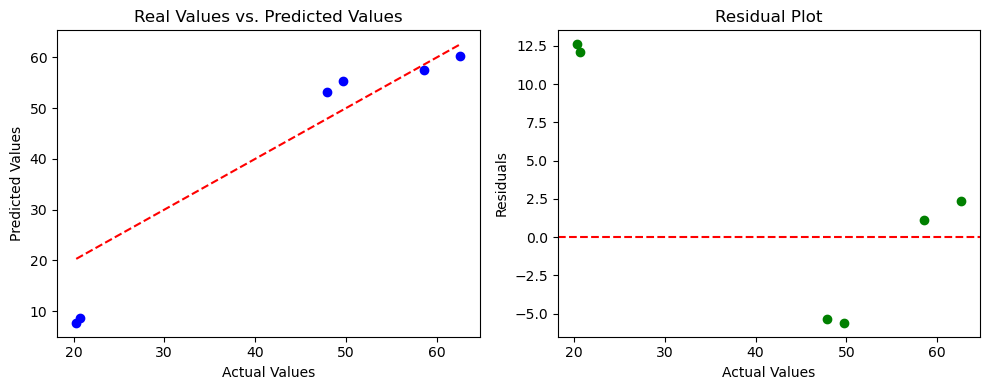

*************** Ridge ***************


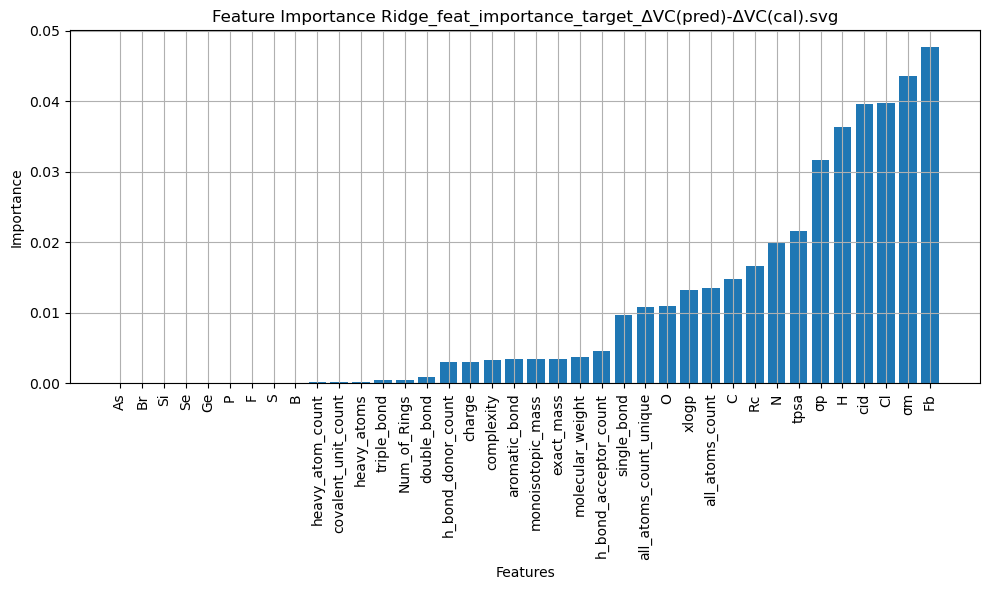

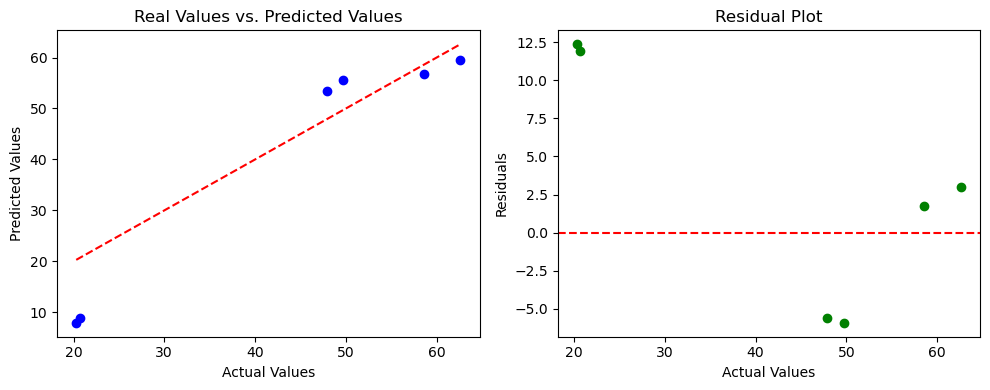

*************** Random Forest ***************


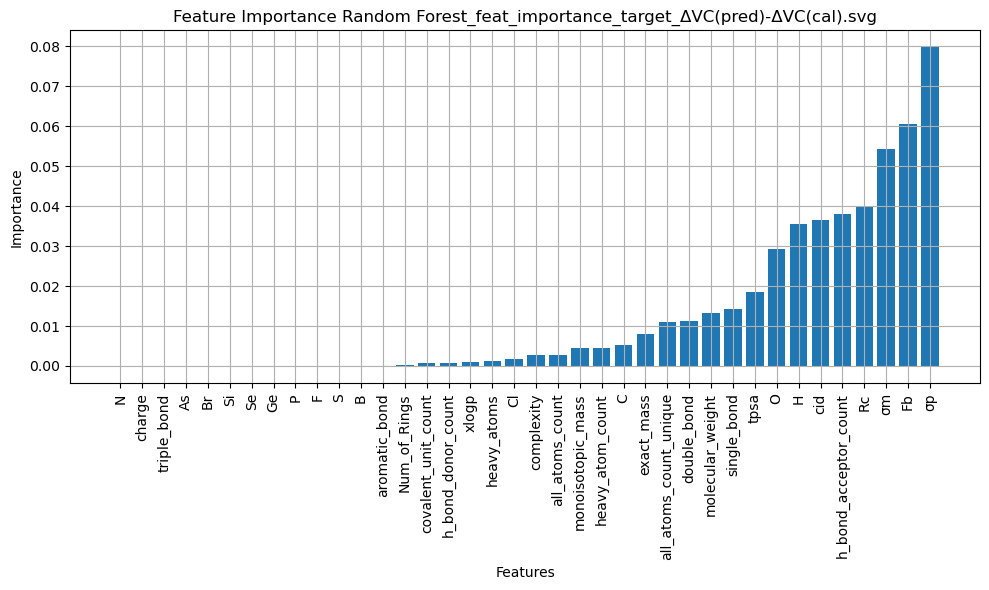

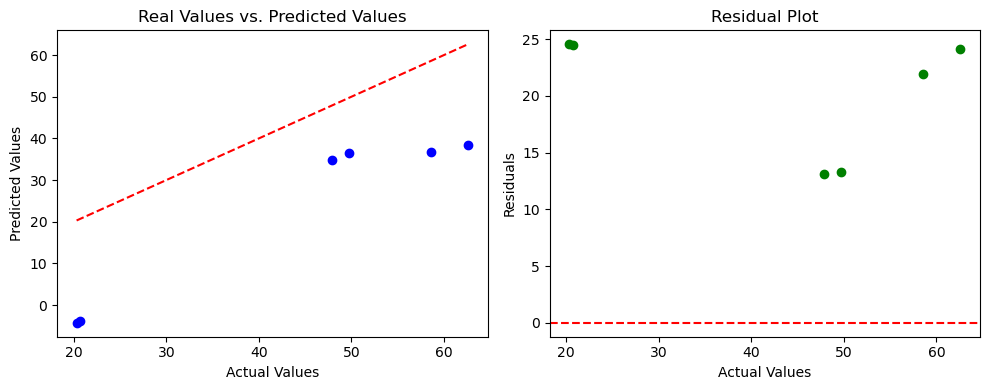

*************** Multi-layer Perceptron ***************


/Users/barradd/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


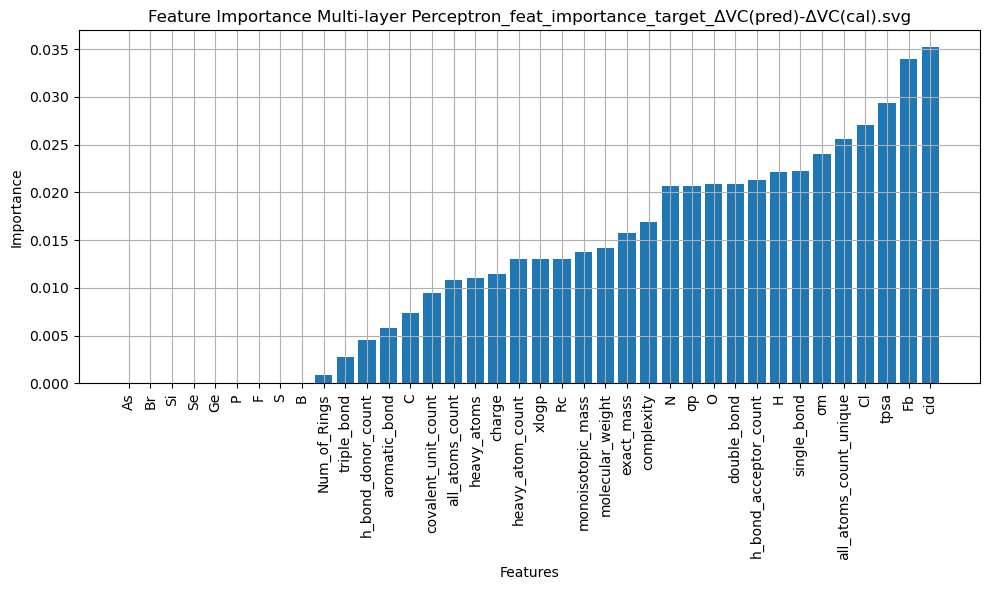

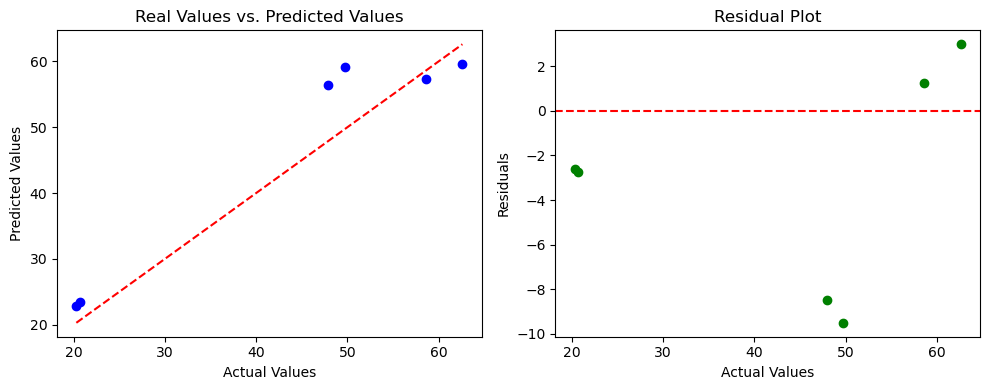

%%%%%%%%%%%%%%% Butadiyne_sum_val %%%%%%%%%%%%%%%



In [96]:
dict_for_all_the_advanced_analysis_metrics = {} 
for key,data_frame_result in dict_of_dataframe_results.items():
    print ('%'*15,key,'%'*15)
    val_results_df = train_ml_reg_models(data_frame_result)
    print ('%'*15,key,'%'*15)
    dict_for_all_the_advanced_analysis_metrics[key]=val_results_df
    # print (val_results_df)
    print ('='*30)
    print () 

In [97]:
for key,item in dict_for_all_the_advanced_analysis_metrics.items():
    print ('%'*15,key,'%'*15)

    print (item)

%%%%%%%%%%%%%%% Pyrene_mean_val %%%%%%%%%%%%%%%
                             R^2        MAE          MSE      MAPE      MedAE
Linear Regression      -9.318065  25.095295  1525.649020  1.034796   5.172162
Ridge                  -0.770741  13.435609   261.763906  0.473341   9.849693
Random Forest           0.223425   9.809833   114.835023  0.240603   9.901500
Multi-layer Perceptron -1.184557  16.735475   323.074090  0.418033  16.795115
%%%%%%%%%%%%%%% Pyrene_sum_val %%%%%%%%%%%%%%%
                             R^2        MAE         MSE      MAPE      MedAE
Linear Regression      -5.277286  22.940000  713.304167  1.185936  25.995000
Ridge                  -1.756561  16.613795  313.240087  0.802664  17.463418
Random Forest          -2.232027  16.849167  367.271589  0.788154  16.568000
Multi-layer Perceptron  0.183778   7.797503   92.788831  0.249821   7.732875
%%%%%%%%%%%%%%% Butadiene_mean_val %%%%%%%%%%%%%%%
                              R^2        MAE          MSE      MAPE      MedAE
